In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
from plotnine import *
from mizani.formatters import custom_format

In [68]:
pd.set_option('display.max_columns', None)

path = '../0_data/collisions_data_2000_2022.csv'
df_collisions = pd.read_csv(path, low_memory = False)

In [69]:
# Filter the data to only contain the important features (from feature importance)
# accident_severity, junction_detail, junction_control, speed_limit
cols_save = ['accident_severity', 'junction_detail', 'junction_control', 'speed_limit']

df_collisions = df_collisions[cols_save]
df_collisions.shape

(3691651, 4)

In [70]:
# Dictionary for renaming the important features (junction detail and road type)

accident_severity_dict = { 
    1: 'Fatal', 2: 'Serious', 3: 'Slight'
    }
junction_detail_dict = {
    0: 'Not Jct', 1: 'Roundabout', 2: 'Roundabout', 3: 'T/Staggered Jct', 5: 'Slip Road', 6: 'Crossroads', 
    7: 'Multi-Arm Jct', 8: 'Private Drive', 9: 'Other Jct', 99: 'Unknown', -1: 'Unknown'
    }
junction_control_dict = {
    0: 'Not Jct', 1: 'Auth. Person', 2: 'Traffic Signal', 3: 'Stop Sign', 4: 'Give Way/Unctrl', 
    -1: 'Unknown', 9: 'Unknown'
    }

# Dictionary of dictionaries for renaming
rename_dict = {
    'accident_severity': accident_severity_dict,
    'junction_detail' : junction_detail_dict,
    'junction_control' : junction_control_dict
}

# Loop through the dictionary to rename values
for column, mapping_dict in rename_dict.items():
    if column in df_collisions.columns: 
        df_collisions[column] = df_collisions[column].replace(mapping_dict)
        if column != 'accident_severity':
            df_collisions[column] = df_collisions[column].astype('category')

In [71]:
# Bin the speed limits into 'unknown', 'under_20', '20-29', '30-39', '40-49', '50-59', '60-69', '70_or_more'
bin_edges = [-np.inf, -1, 29, 39, 49, 59, 69, np.inf]
bin_labels = ['Unknown', 'Under 30', '30', '40', '50', '60', '70 Or Over']
df_collisions['binned_speed_limit'] = pd.cut(df_collisions['speed_limit'], bins = bin_edges, labels = bin_labels, include_lowest = True)

In [72]:
df_collisions.head()

,accident_severity,junction_detail,junction_control,speed_limit,binned_speed_limit
0,Slight,Not Jct,Unknown,70.0,70 Or Over
1,Slight,Roundabout,Give Way/Unctrl,70.0,70 Or Over
2,Slight,Not Jct,Unknown,60.0,60
3,Slight,Not Jct,Unknown,70.0,70 Or Over
4,Slight,Slip Road,Give Way/Unctrl,70.0,70 Or Over


## Check proportion of Unknowns for each plot (count vs junction detail, count vs junction control, count vs speed limit)

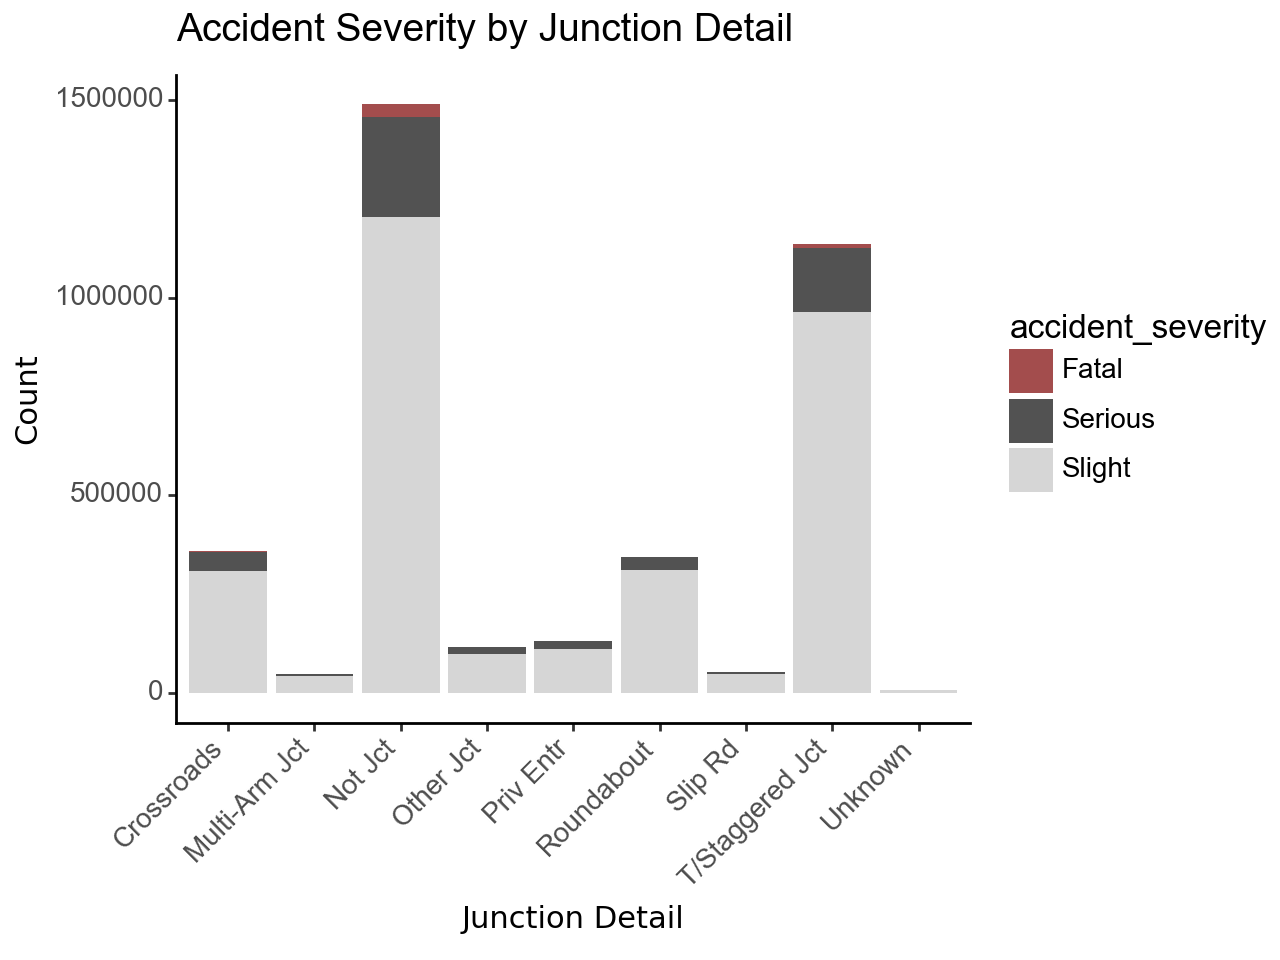

In [7]:
# Count vs Junction Detail

# Ensure accident_severity is a categorical variable
df_collisions['accident_severity'] = df_collisions['accident_severity'].astype('category')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_collisions.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Plot
plot = (
    ggplot(df_grouped, aes(x='junction_detail', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Count", x="Junction Detail", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial")
    )
)

print(plot)

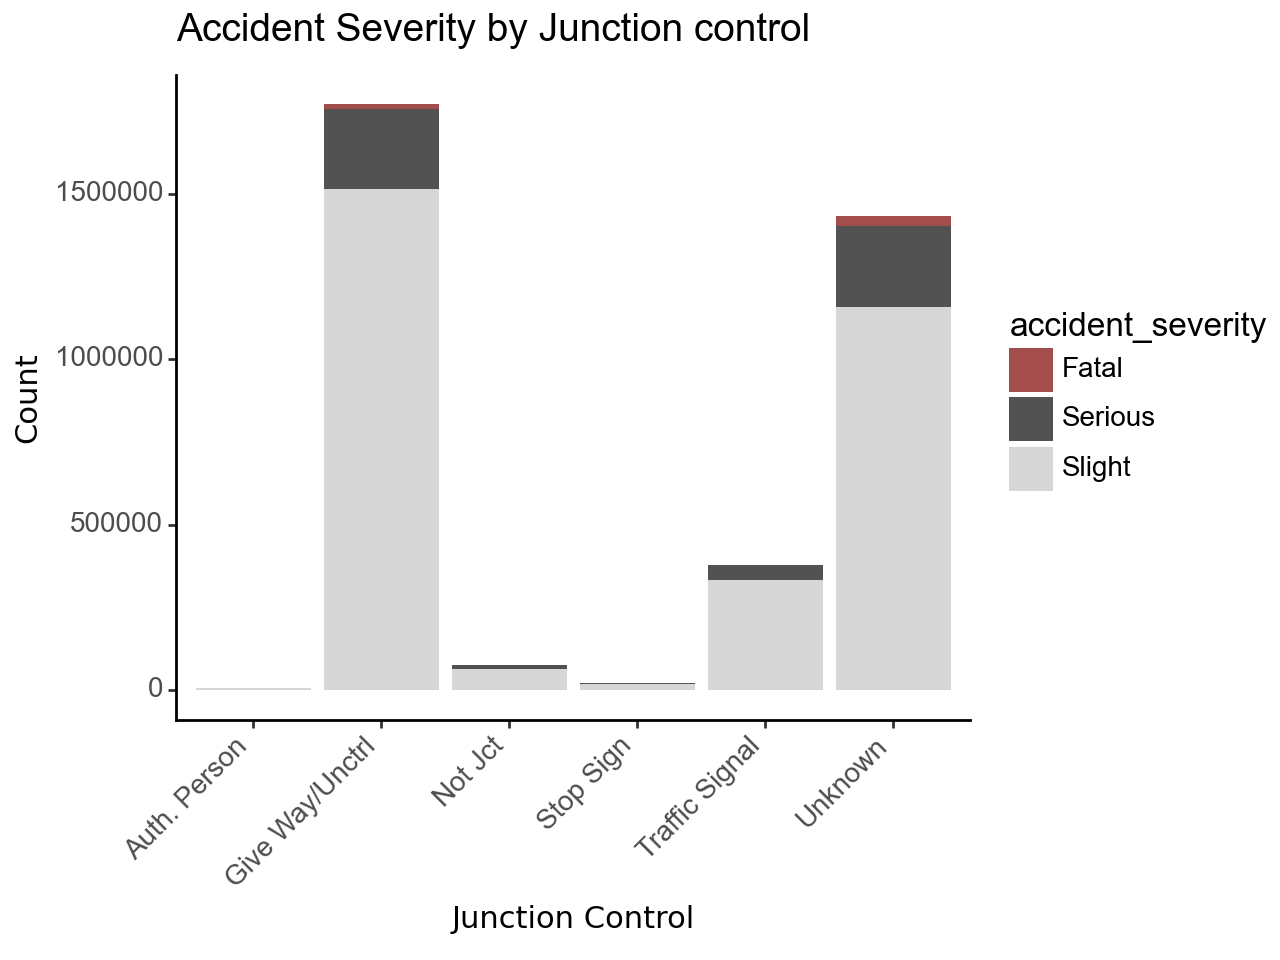

In [8]:
# Count vs Junction Control

# Ensure accident_severity is a categorical variable
df_collisions['accident_severity'] = df_collisions['accident_severity'].astype('category')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_collisions.groupby(['junction_control', 'accident_severity']).size().reset_index(name='count')

# Plot
plot = (
    ggplot(df_grouped, aes(x='junction_control', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Count", x="Junction Control", title="Accident Severity by Junction control") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial")
    )
)

print(plot)

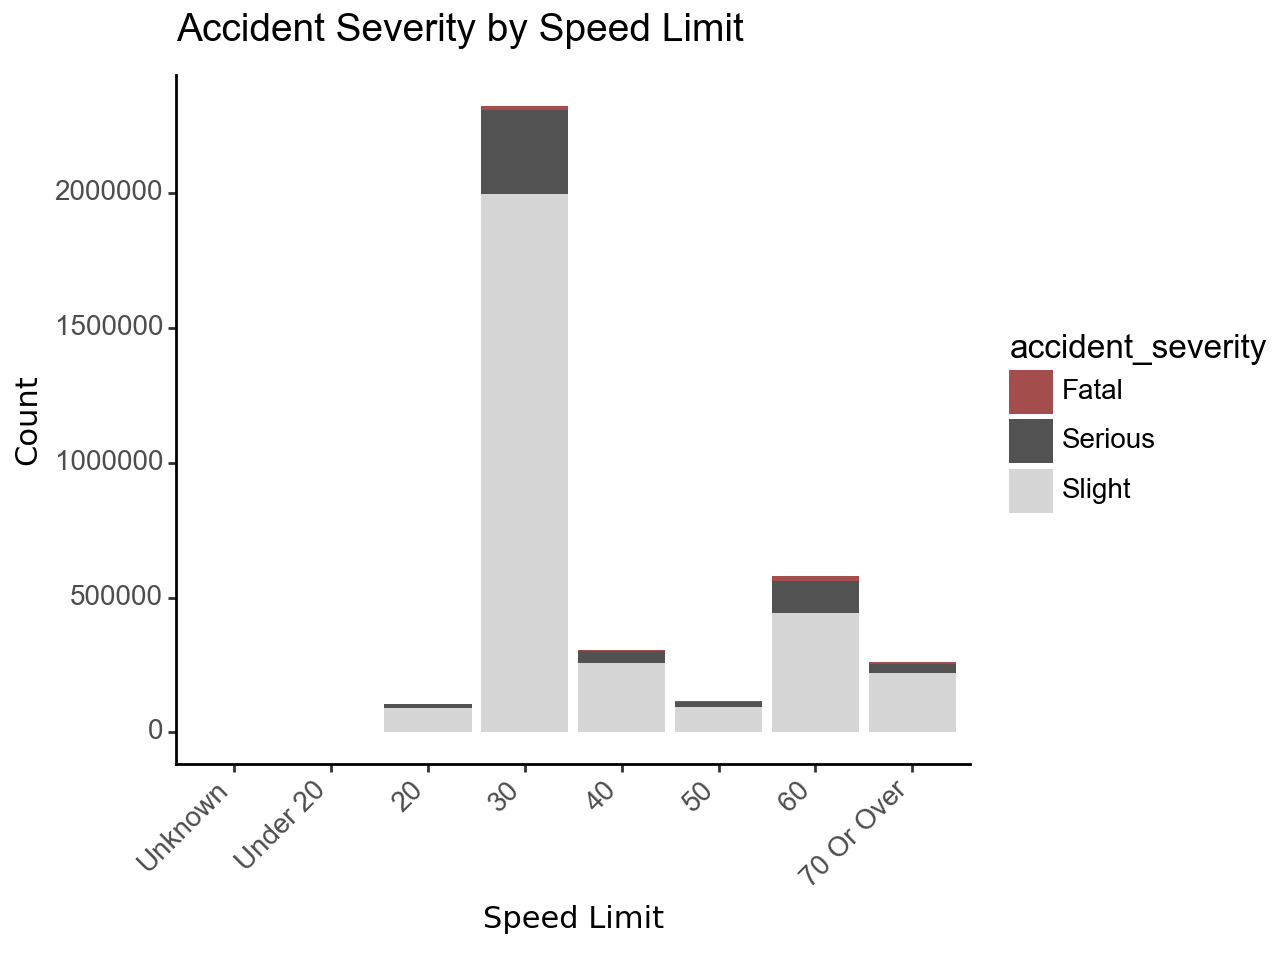

In [9]:
# Count vs Speed Limit

# Ensure accident_severity is a categorical variable
df_collisions['accident_severity'] = df_collisions['accident_severity'].astype('category')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_collisions.groupby(['binned_speed_limit', 'accident_severity']).size().reset_index(name='count')

# Plot
plot = (
    ggplot(df_grouped, aes(x='binned_speed_limit', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Count", x="Speed Limit", title="Accident Severity by Speed Limit") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial")
    )
)

print(plot)

For speed limit and junction detail, unknowns are quite few and could be removed. But for junction control, makes up quite a large portion...

In [ ]:
# Splitting the dataframe into specific dataframes for each plot

# Create a dataset for plotting junction detail vs. accident severity
df_junction_detail = df_collisions[['junction_detail', 'accident_severity']].copy()
df_junction_detail_filtered = df_junction_detail[df_junction_detail['junction_detail'] != 'Unknown']
df_junction_detail_filtered['junction_detail'] = df_junction_detail_filtered['junction_detail'].cat.remove_categories(['Unknown'])

# Create a dataset for plotting junction control vs. accident severity
df_junction_control = df_collisions[['junction_control', 'accident_severity']].copy()
df_junction_control_filtered = df_junction_control[df_junction_control['junction_control'] != 'Unknown']
df_junction_control_filtered['junction_control'] = df_junction_control_filtered['junction_control'].cat.remove_categories(['Unknown'])

# Create a dataset for plotting binned speed limit vs. accident severity
df_speed_limit = df_collisions[['binned_speed_limit', 'accident_severity']].copy()
df_speed_limit_filtered = df_speed_limit[df_speed_limit['binned_speed_limit'] != 'Unknown']
df_speed_limit_filtered['binned_speed_limit'] = df_speed_limit_filtered['binned_speed_limit'].cat.remove_categories(['Unknown'])


## Junction detail

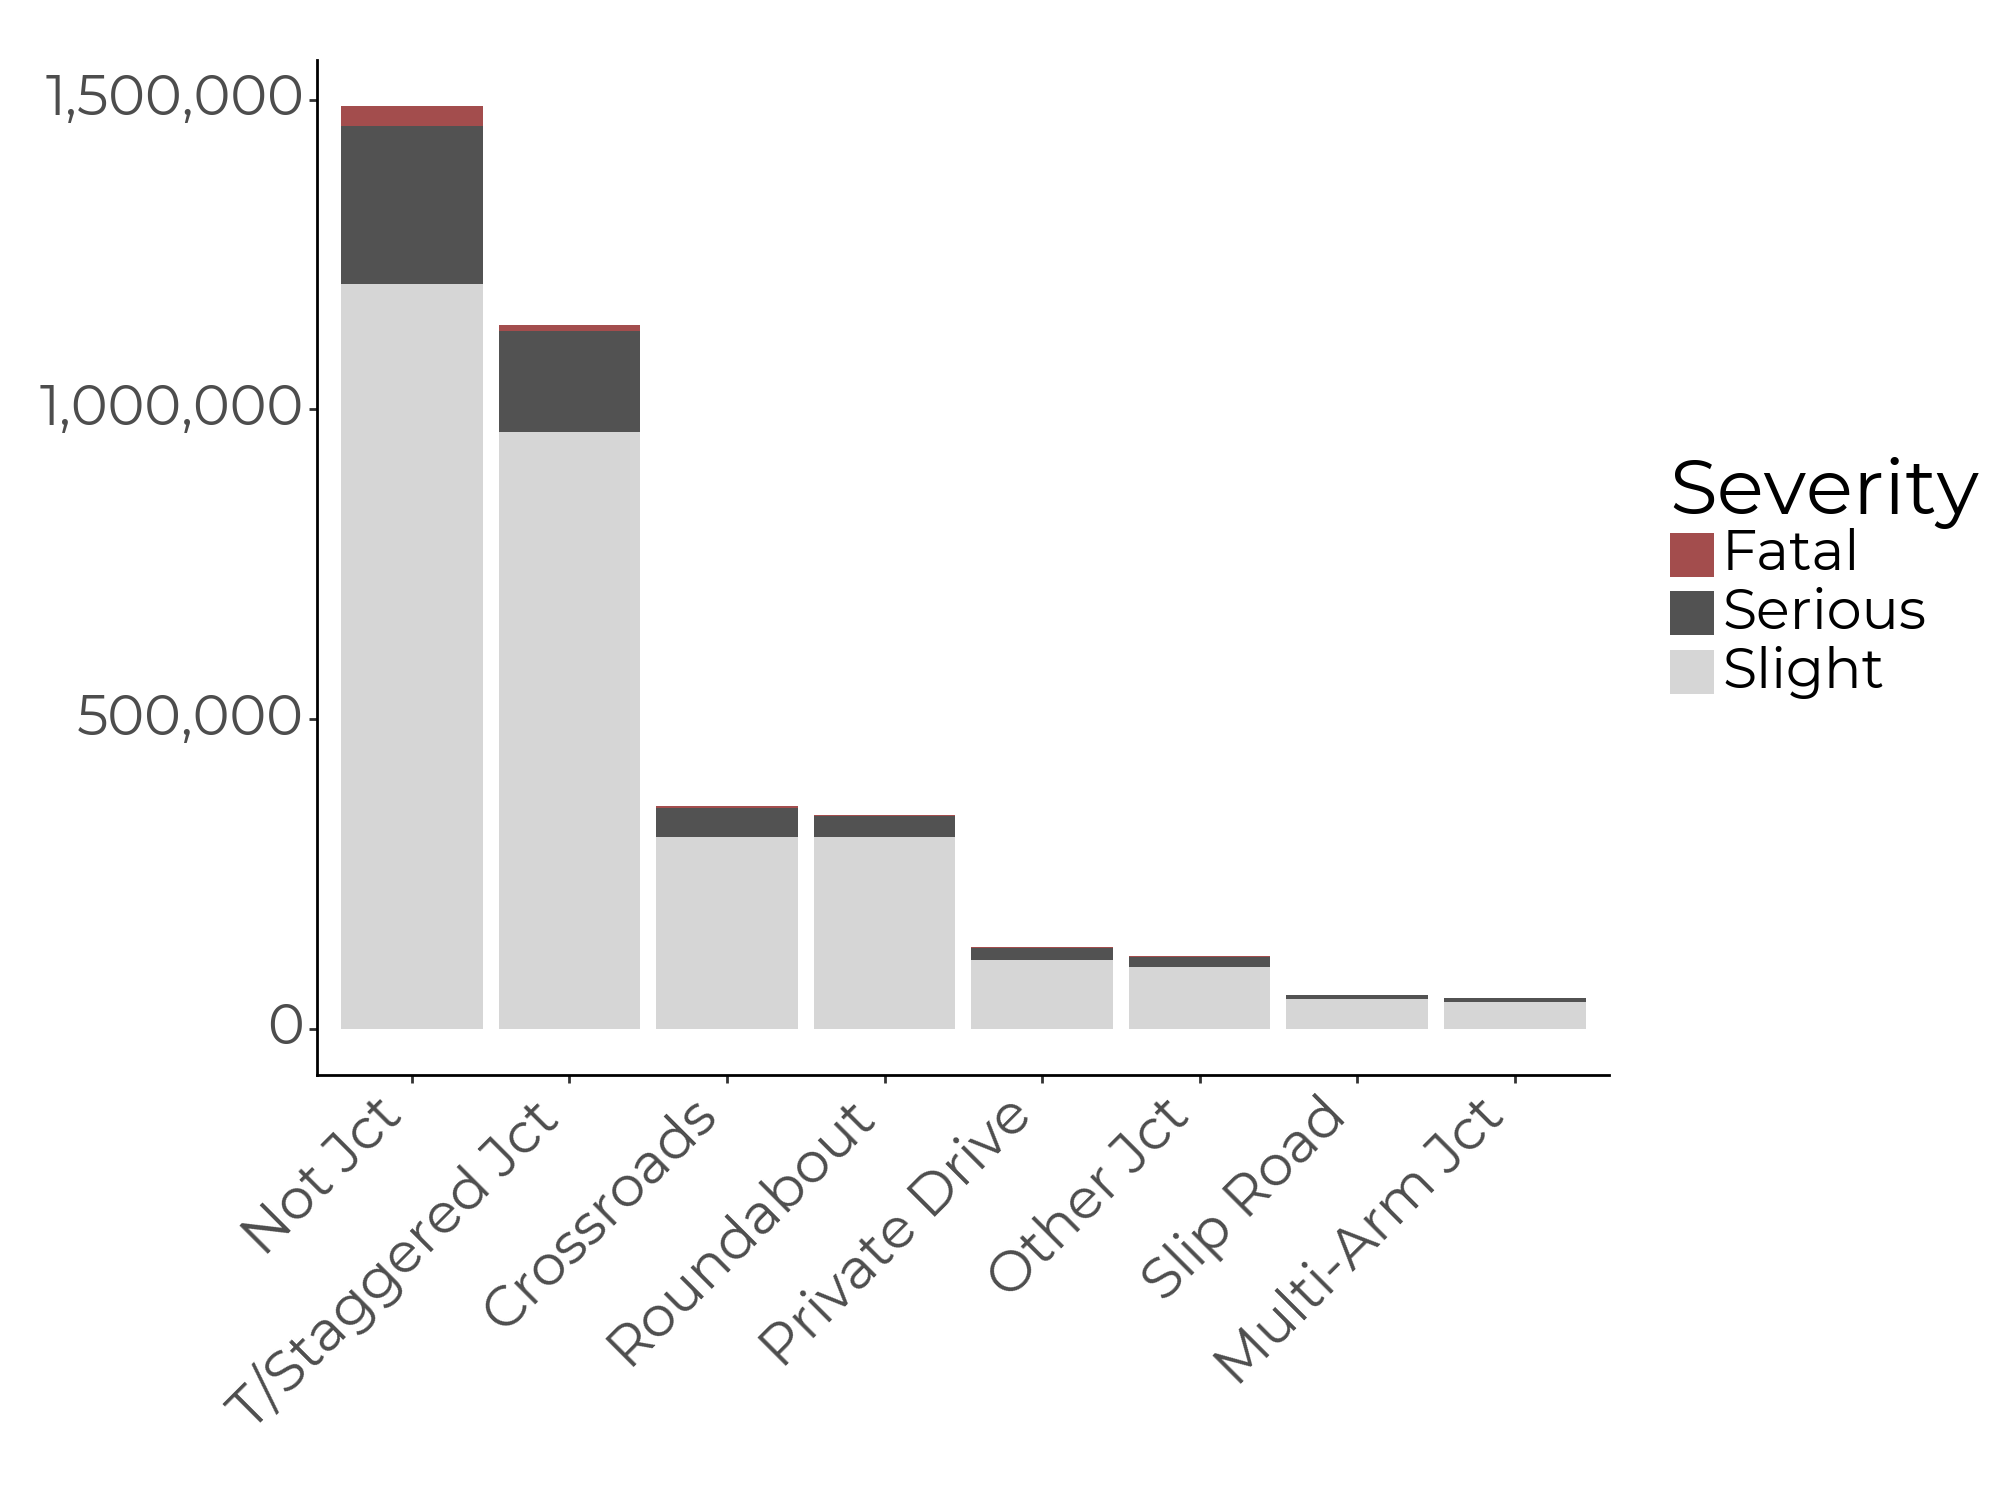

c:\Users\loma5202\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 10 x 7.5 in image.
c:\Users\loma5202\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: ../4_other/acc_jct_detail.svg


In [83]:
# Count vs Junction Detail

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_detail_filtered.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
df_total_counts = df_grouped.groupby('junction_detail')['count'].sum().reset_index(name='total_count')

# Merge the total counts back to the grouped dataframe
df_grouped = df_grouped.merge(df_total_counts, on='junction_detail')

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -total_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="", x="", title="", fill="Severity",) +
    scale_y_continuous(labels=lambda x: ["{:,}".format(int(label)) for label in x]) +
    theme_classic() +
    theme(
        #axis_text_x=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1, size=20, family="Montserrat"),
        axis_text_y=element_text(size=20, family="Montserrat"),
        legend_title=element_text(size=28, family="Montserrat"),
        legend_text=element_text(size=20, family="Montserrat"),
        figure_size=(10, 7.5)
    )
)

print(plot)

ggsave(plot, "../4_other/acc_jct_detail.svg", format="svg")

In [62]:
# Calculate percentage

# Filter for only fatal accidents
df_fatal = df_junction_detail_filtered[df_junction_detail_filtered['accident_severity'] == 'Fatal']

# Group by junction_detail and count the number of fatal accidents
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Group the original filtered dataframe by junction_detail and count the total accidents
df_total_counts = df_junction_detail_filtered.groupby('junction_detail').size().reset_index(name='total_count')

# Merge the fatal counts with the total counts
df_percentage = pd.merge(df_fatal_counts, df_total_counts, on='junction_detail')

# Calculate the percentage of fatal accidents
df_percentage['fatal_percentage'] = df_percentage['fatal_count'] / df_percentage['total_count'] * 100


,junction_detail,fatal_count,total_count,fatal_percentage
0,Crossroads,2868,359010,0.798864
1,Multi-Arm Jct,328,49284,0.665530
2,Not Jct,31751,1489642,2.131452
3,Other Jct,1130,117513,0.961596
4,Private Drive,1379,132013,1.044594
5,Roundabout,1211,344436,0.351589
6,Slip Road,780,54626,1.427891
7,T/Staggered Jct,10340,1136275,0.909991


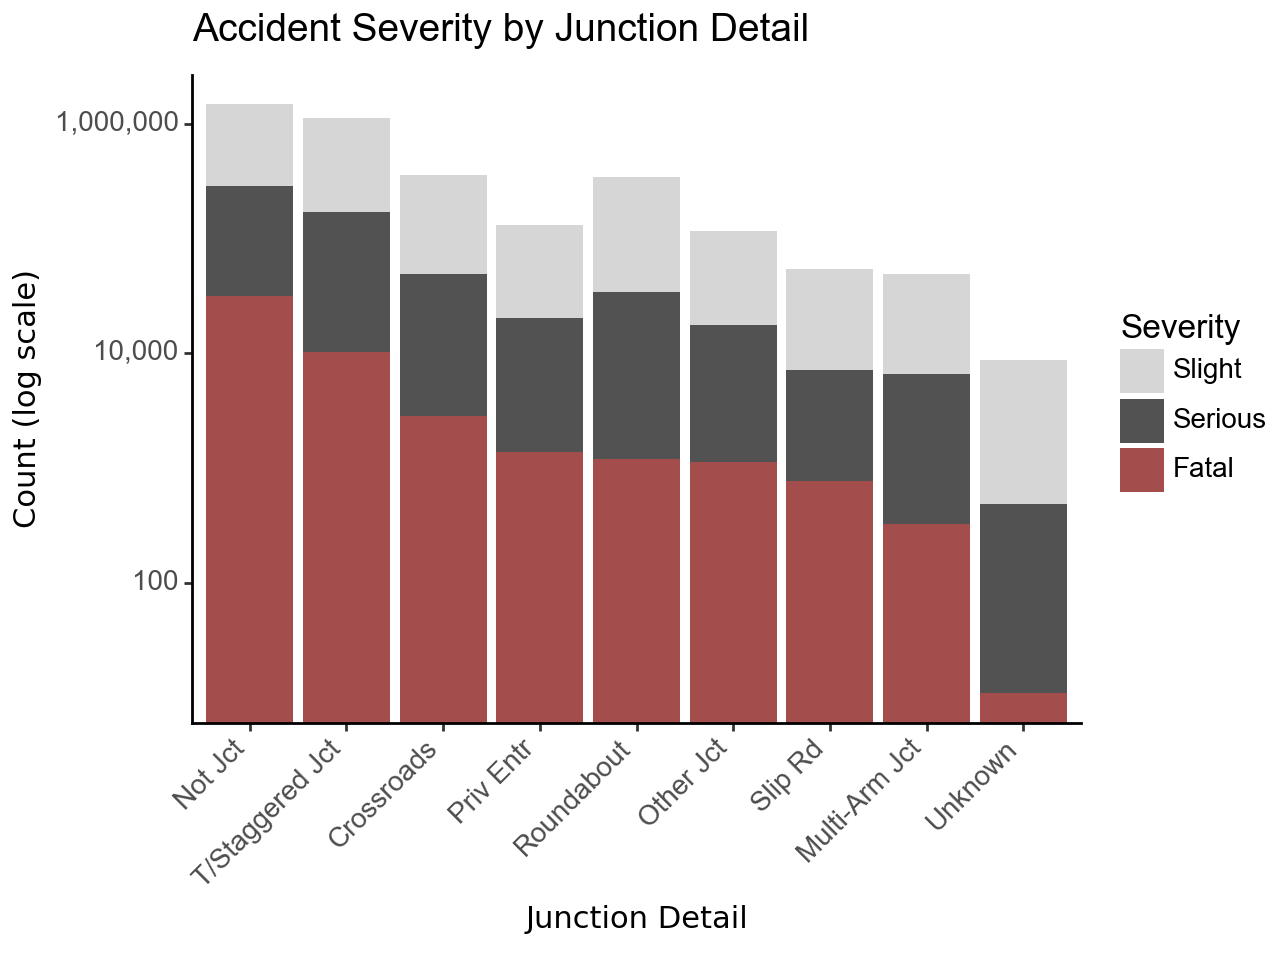

In [16]:
# Including Unknown values, sort by number of fatal accidents, absolute counts on logarithmic scale

# Filter for only fatal accidents within the junction detail dataset
df_fatal = df_junction_detail[df_junction_detail['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_detail.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='junction_detail', how='left')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="Junction Detail", fill="Severity", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)

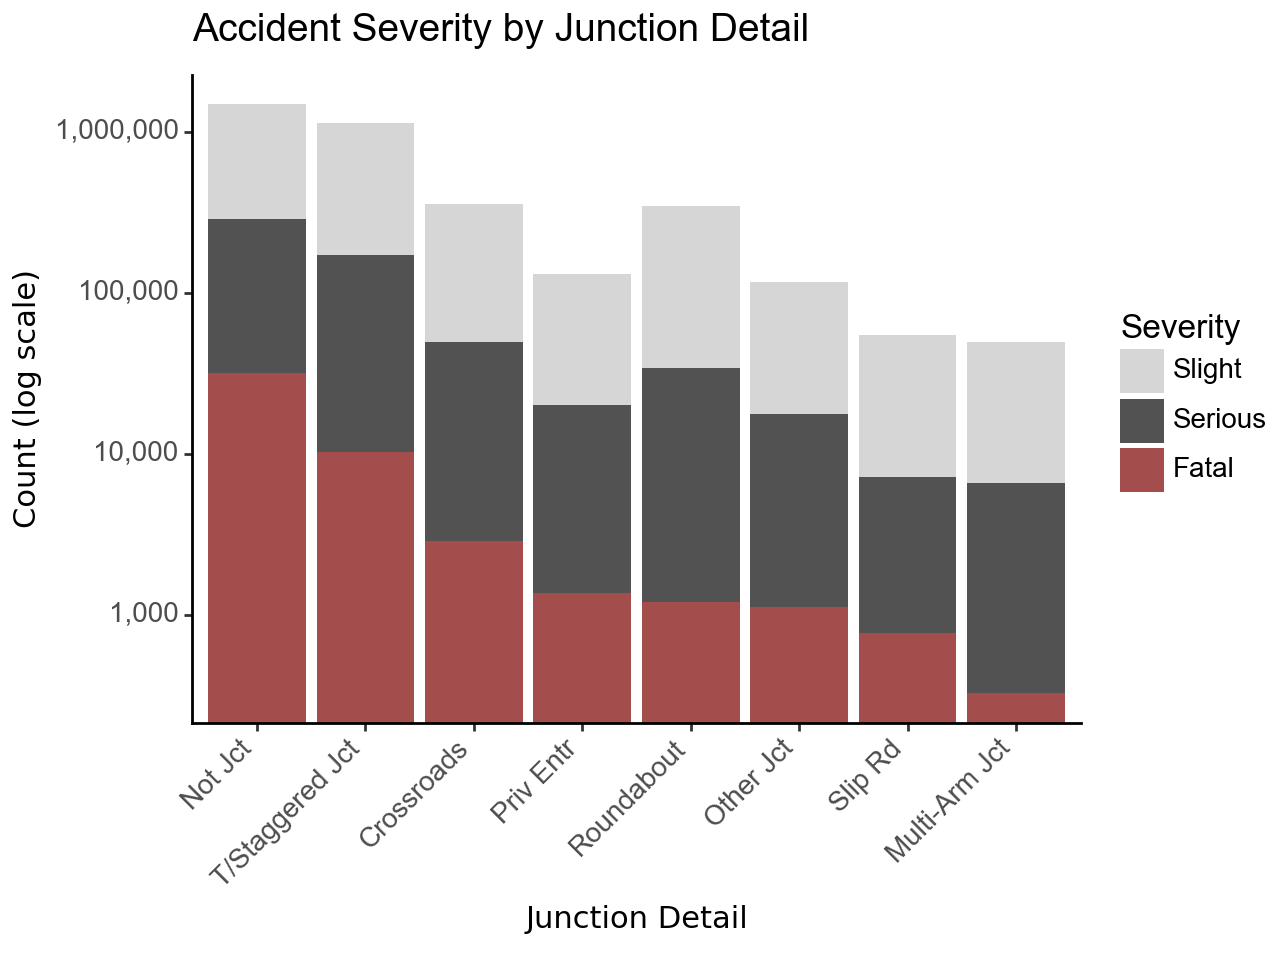

In [17]:
# Excluding Unknown values, sort by number of fatal accidents, absolute counts on logarithmic scale

# Filter for only fatal accidents within the junction detail dataset
df_fatal = df_junction_detail_filtered[df_junction_detail_filtered['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_detail_filtered.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='junction_detail', how='left')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="Junction Detail", fill="Severity", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)

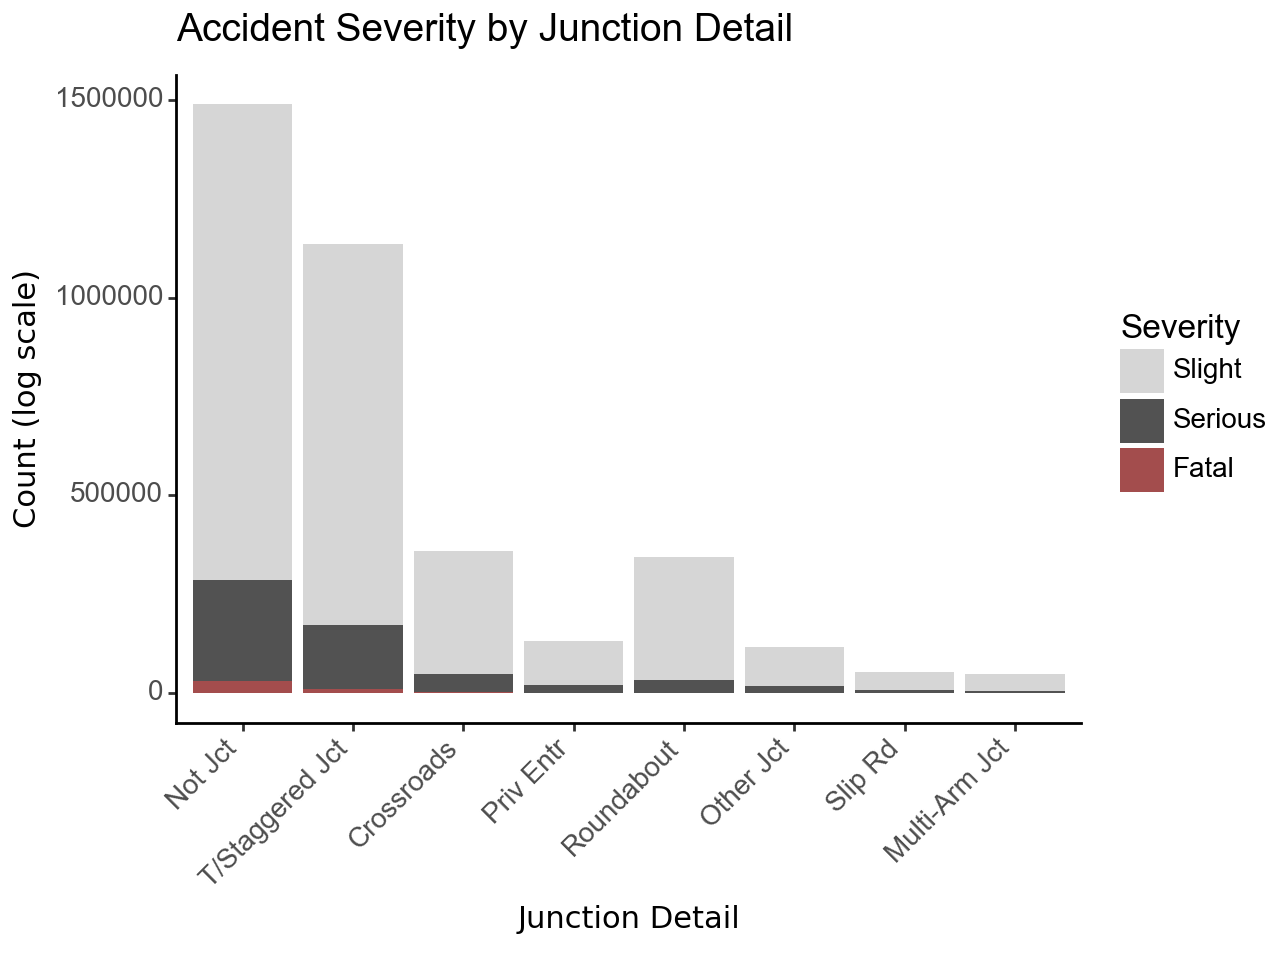

In [37]:
# Excluding Unknown values, sort by number of fatal accidents, absolute counts on logarithmic scale

# Filter for only fatal accidents within the junction detail dataset
df_fatal = df_junction_detail_filtered[df_junction_detail_filtered['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_detail_filtered.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='junction_detail', how='left')

# Reverse the Order of Stacking
#df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    #scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="Junction Detail", fill="Severity", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)

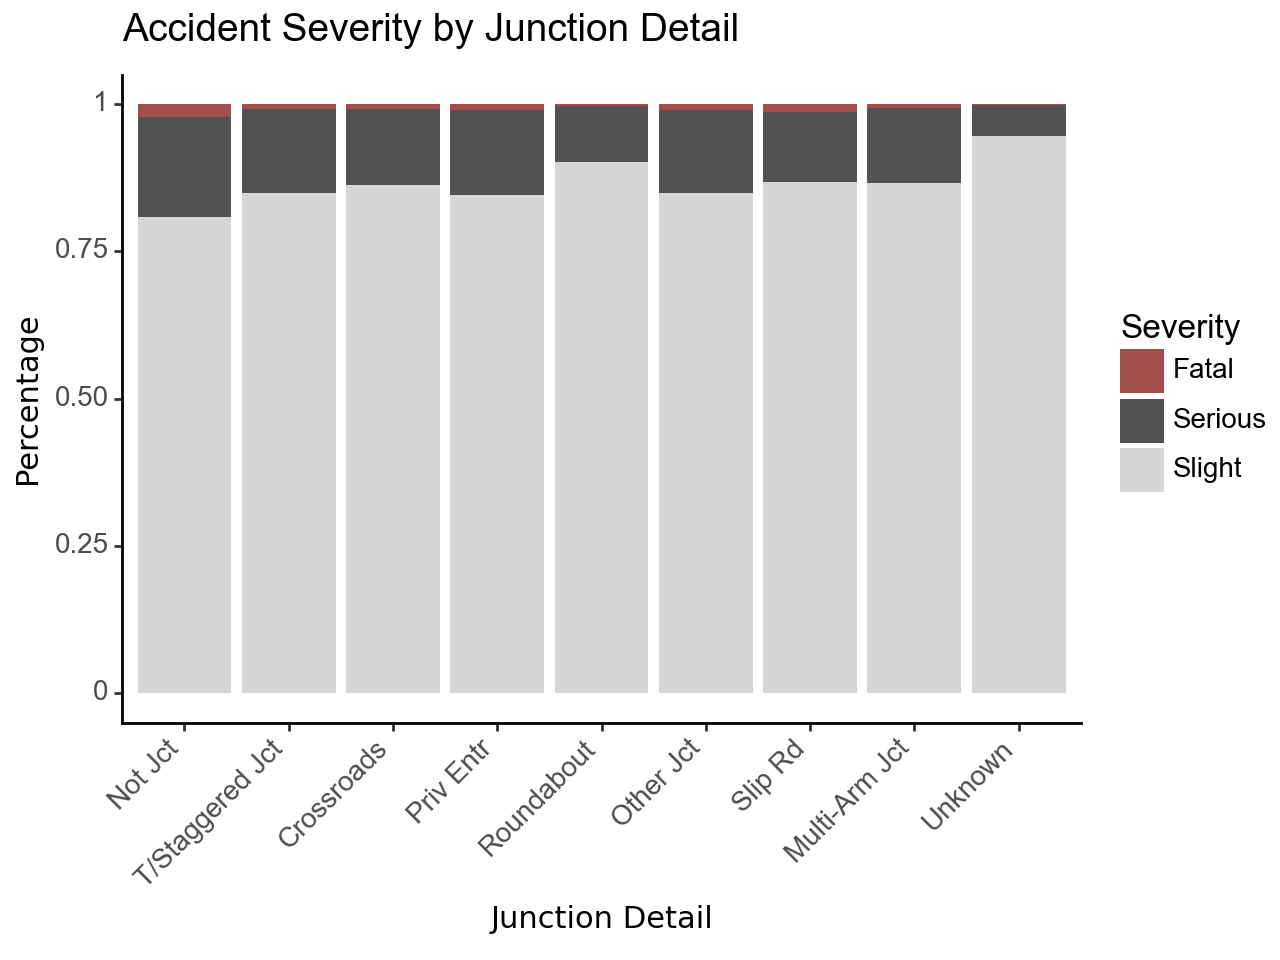

In [32]:
# Including Unknown values, sort by number of fatal accidents, relative counts on a percentage scale

# Filter for only fatal accidents within the junction detail dataset
df_fatal = df_junction_detail[df_junction_detail['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped_detail = df_junction_detail.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts_detail = df_grouped_detail.groupby('junction_detail')['count'].transform('sum')

# Calculate the percentage
df_grouped_detail['percentage'] = df_grouped_detail['count'] / total_counts_detail * 100

# Merge with fatal counts for ordering
df_grouped_detail = df_grouped_detail.merge(df_fatal_counts, on='junction_detail')

# Plot for junction detail vs. accident severity
plot_junction_detail = (
    ggplot(df_grouped_detail, aes(x='reorder(junction_detail, -fatal_count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='fill') +  # Stacked bar plot with relative counts
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Percentage", x="Junction Detail", fill="Severity", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot_junction_detail)

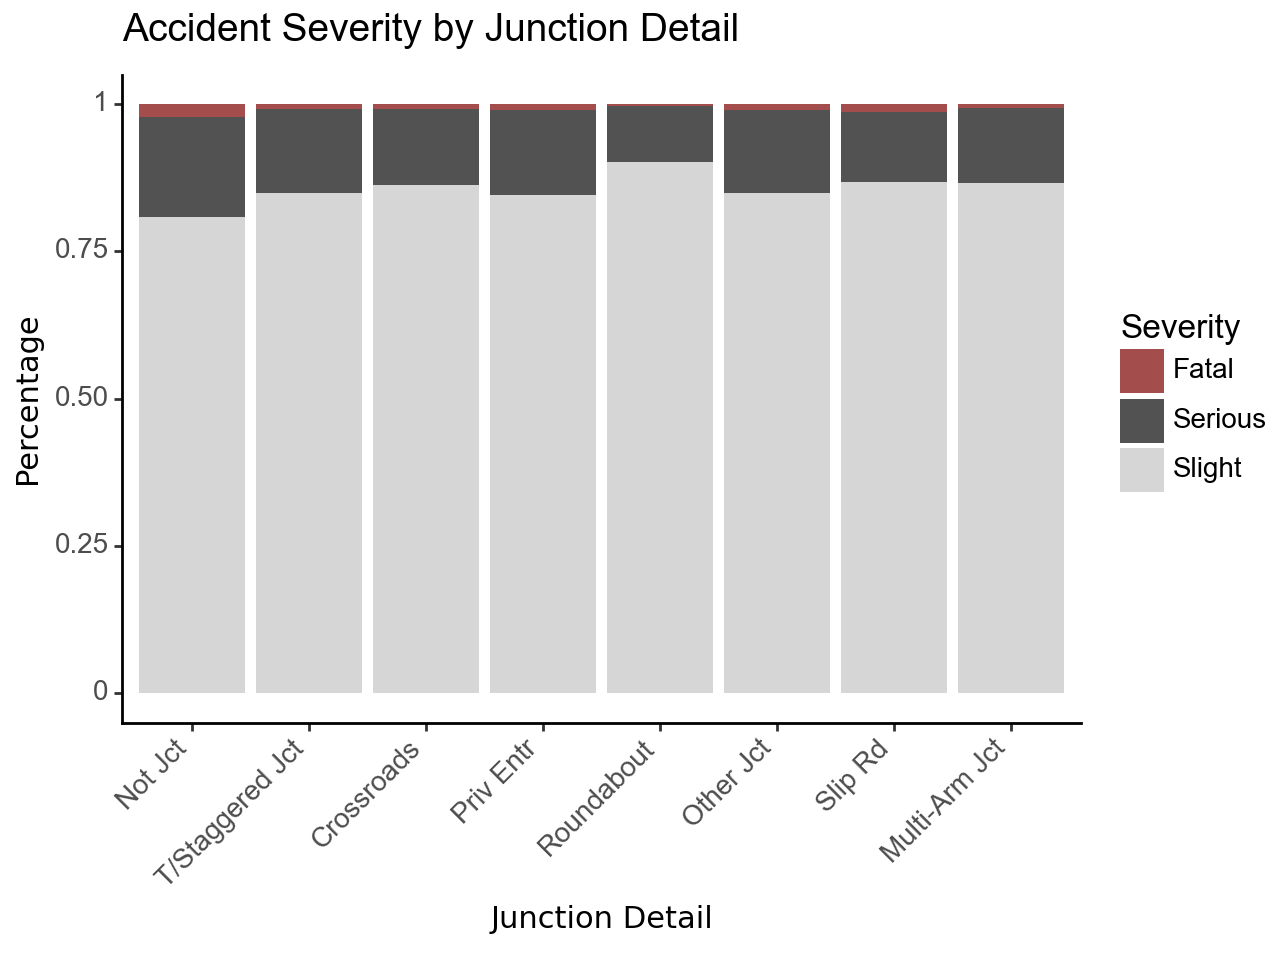

In [33]:
# Excluding Unknown values, sort by number of fatal accidents, relative counts on a percentage scale

# Filter for only fatal accidents within the junction detail dataset
df_fatal = df_junction_detail_filtered[df_junction_detail_filtered['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped_detail = df_junction_detail_filtered.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts_detail = df_grouped_detail.groupby('junction_detail')['count'].transform('sum')

# Calculate the percentage
df_grouped_detail['percentage'] = df_grouped_detail['count'] / total_counts_detail * 100

# Merge with fatal counts for ordering
df_grouped_detail = df_grouped_detail.merge(df_fatal_counts, on='junction_detail')

# Plot for junction detail vs. accident severity
plot_junction_detail = (
    ggplot(df_grouped_detail, aes(x='reorder(junction_detail, -fatal_count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='fill') +  # Stacked bar plot with relative counts
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Percentage", x="Junction Detail", fill="Severity", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot_junction_detail)

Not sure about the following plots...

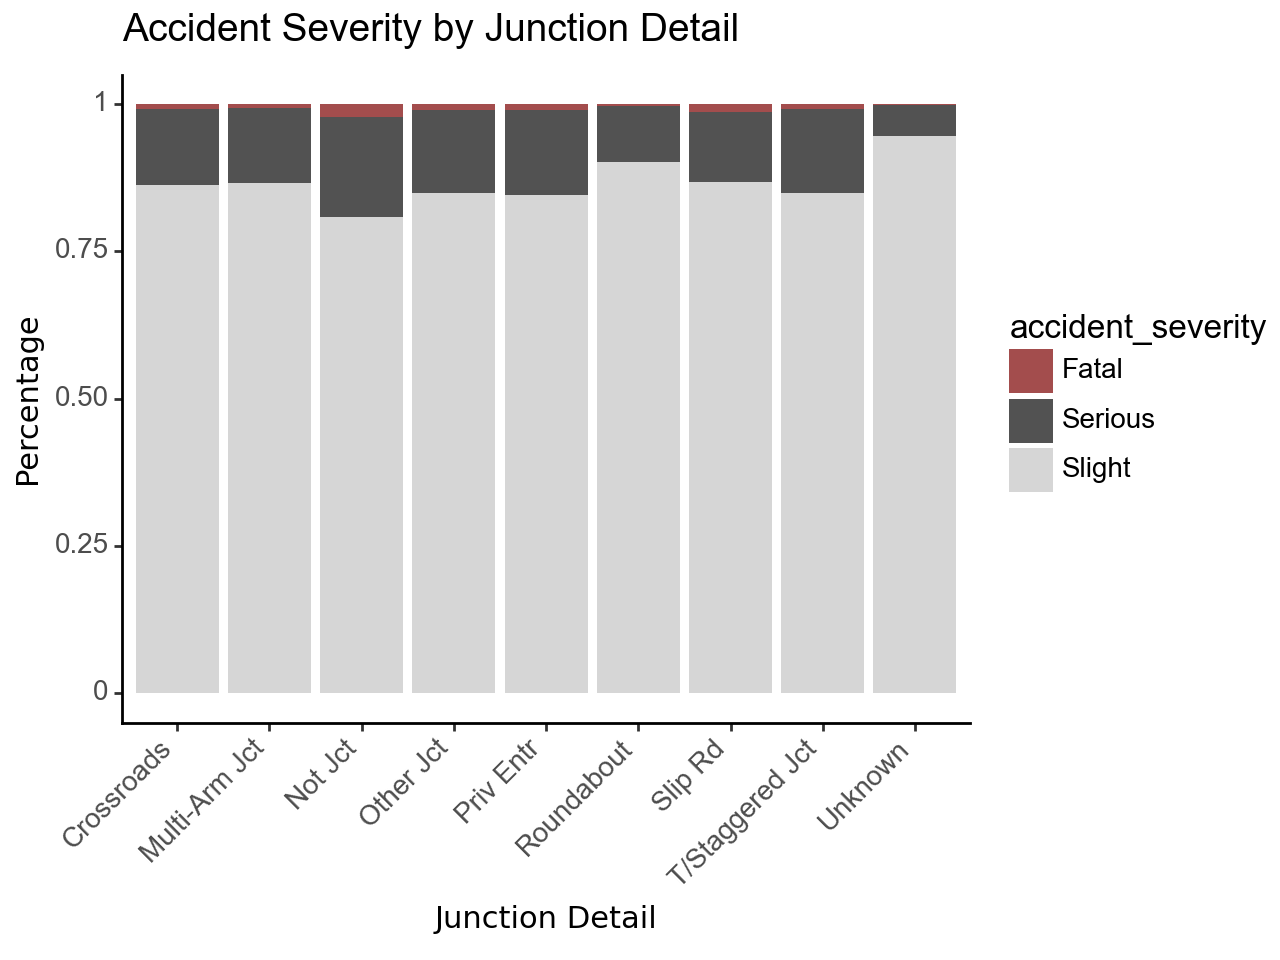

In [25]:
'''
# Ensure accident_severity is a categorical variable
#df_collisions['accident_severity'] = df_collisions['accident_severity'].astype('category')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_collisions.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts = df_grouped.groupby('junction_detail')['count'].transform('sum')

# Calculate the percentage
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100

# Plot
plot = (
    ggplot(df_grouped, aes(x='junction_detail', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='fill') +  # Use position='fill' for 100% stacked bars
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Percentage", x="Junction Detail", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial")
    )
)

print(plot)

'''

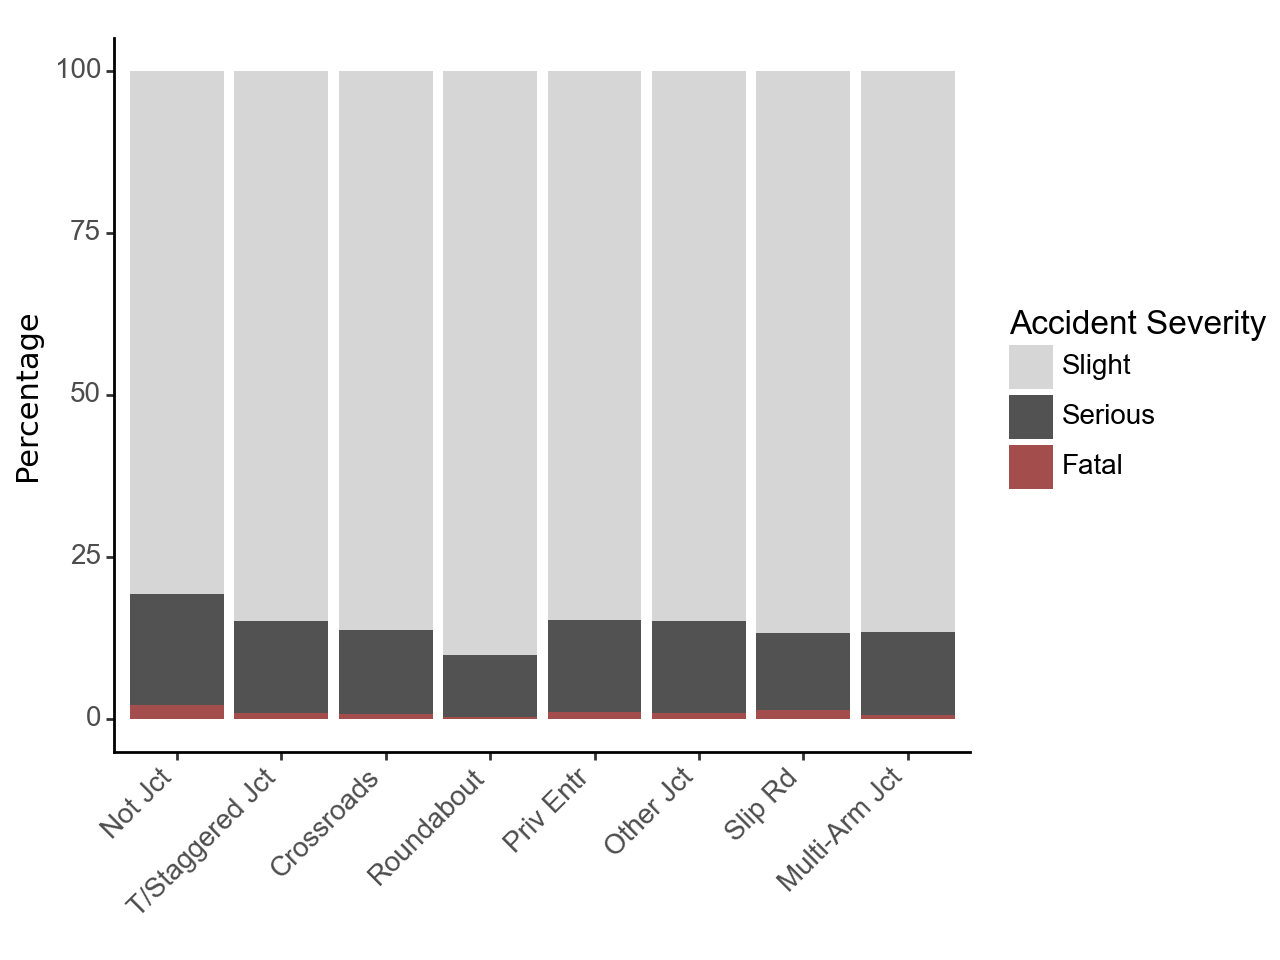

In [13]:
'''# Sorted based on the number of accidents for the junction detail

# Ensure accident_severity is a categorical variable
df_collisions['accident_severity'] = df_collisions['accident_severity'].astype('category')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_collisions.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Remove unknown values
df_grouped = df_grouped.loc[~(df_grouped.isin(['Unknown']).any(axis=1))]

# Calculate the total count for each junction detail
total_counts = df_grouped.groupby('junction_detail')['count'].transform('sum')

# Calculate the percentage
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Percentage", x="", fill="Accident Severity", title="") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)'''

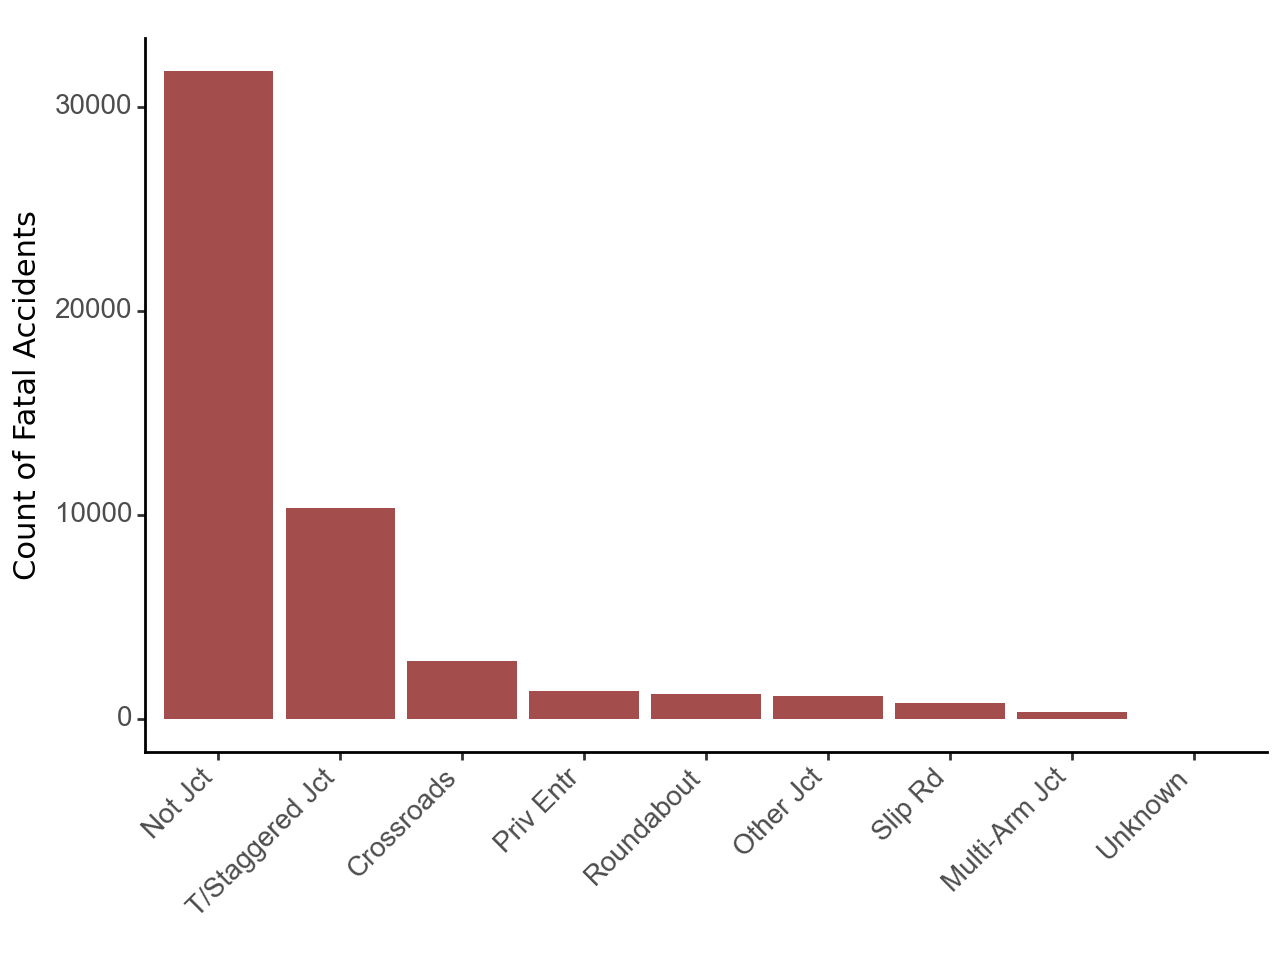

In [26]:
'''# Filter for only fatal accidents
df_fatal = df_collisions[df_collisions['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_grouped = df_fatal.groupby('junction_detail').size().reset_index(name='count')

# Remove unknown values
#df_fatal_grouped = df_fatal_grouped.loc[~(df_fatal_grouped.isin(['Unknown']).any(axis=1))]

# Plot
plot = (
    ggplot(df_fatal_grouped, aes(x='reorder(junction_detail, -count)', y='count')) +
    geom_bar(stat='identity', position='dodge', fill="#A34D4D") +
    labs(y="Count of Fatal Accidents", x="", title="") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_position='none'
    )
)

print(plot)'''

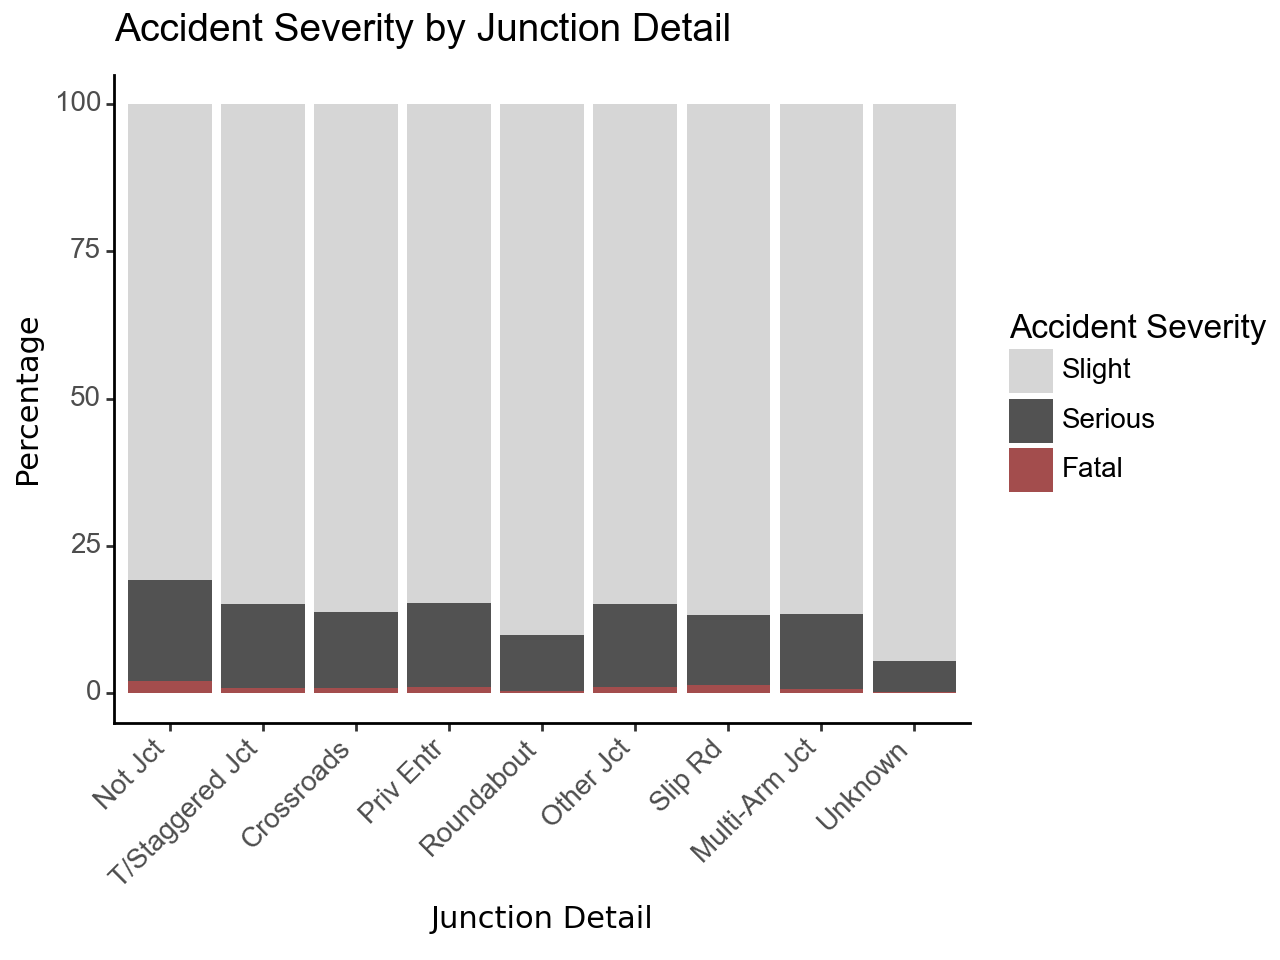

In [27]:
'''# Sorted based on number of fatal accidents

# Filter for only fatal accidents
df_fatal = df_collisions[df_collisions['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Remove 'Unknown' values from both datasets
#df_fatal_counts = df_fatal_counts[df_fatal_counts['junction_detail'] != 'Unknown']
#df_collisions = df_collisions[df_collisions['junction_detail'] != 'Unknown']

# Ensure accident_severity is a categorical variable
df_collisions['accident_severity'] = df_collisions['accident_severity'].astype('category')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_collisions.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts = df_grouped.groupby('junction_detail')['count'].transform('sum')

# Calculate the percentage
df_grouped['percentage'] = df_grouped['count'] / total_counts * 100

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='junction_detail')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -fatal_count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Percentage", x="Junction Detail", fill="Accident Severity", title="Accident Severity by Junction Detail") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)
'''

C:\Users\loma5202\AppData\Local\Temp\ipykernel_22444\631646786.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\loma5202\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


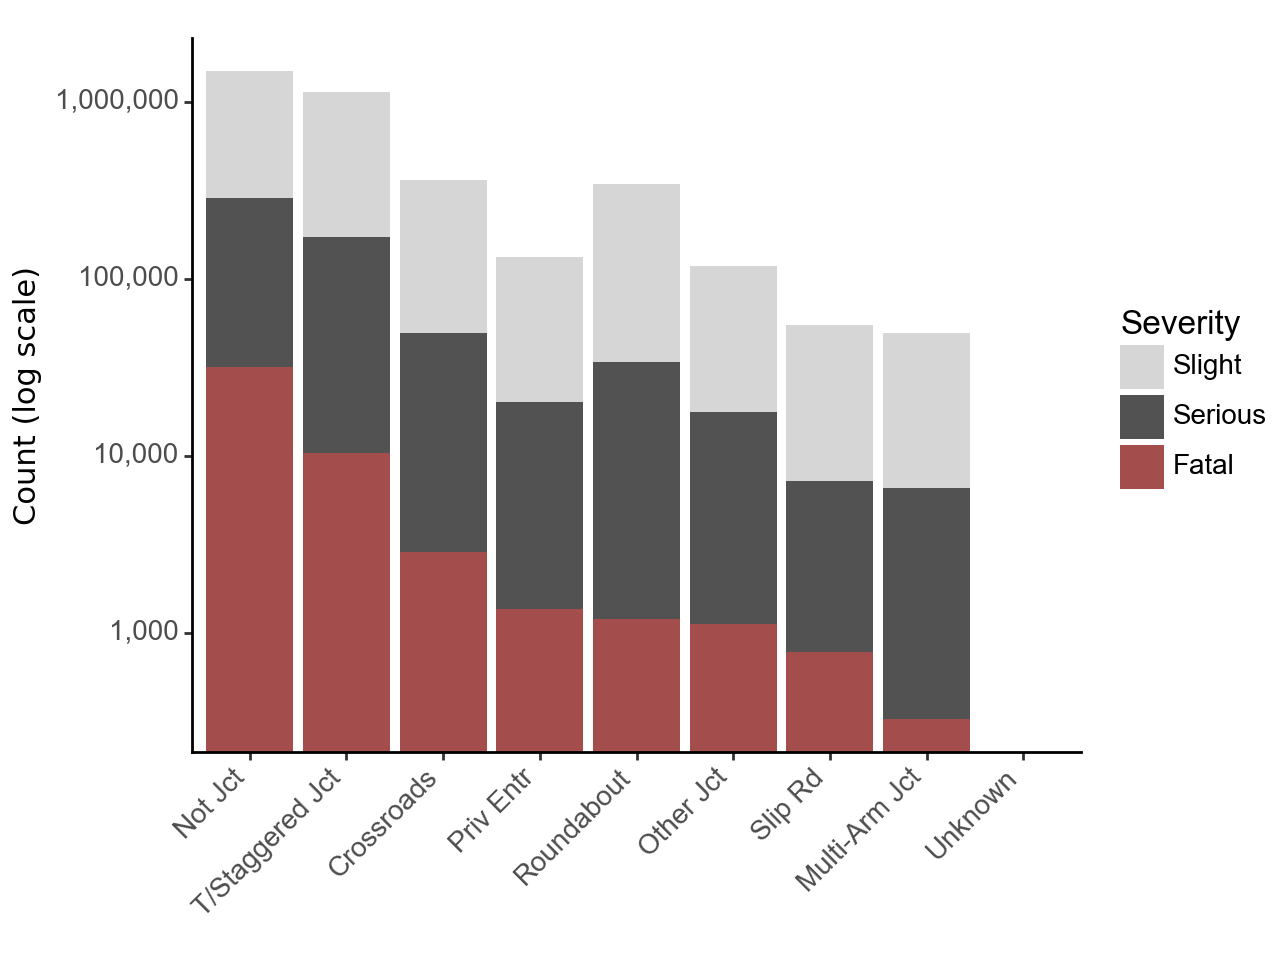

In [11]:
'''# Filter for only fatal accidents
df_fatal = df_collisions[df_collisions['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_detail').size().reset_index(name='fatal_count')

# Remove 'Unknown' values
df_grouped = df_collisions[df_collisions['junction_detail'] != 'Unknown']

# Ensure accident_severity is a categorical variable
df_grouped['accident_severity'] = df_grouped['accident_severity'].astype('category')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_grouped.groupby(['junction_detail', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='junction_detail')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_detail, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="", fill="Severity", title="") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)
'''

## Junction control

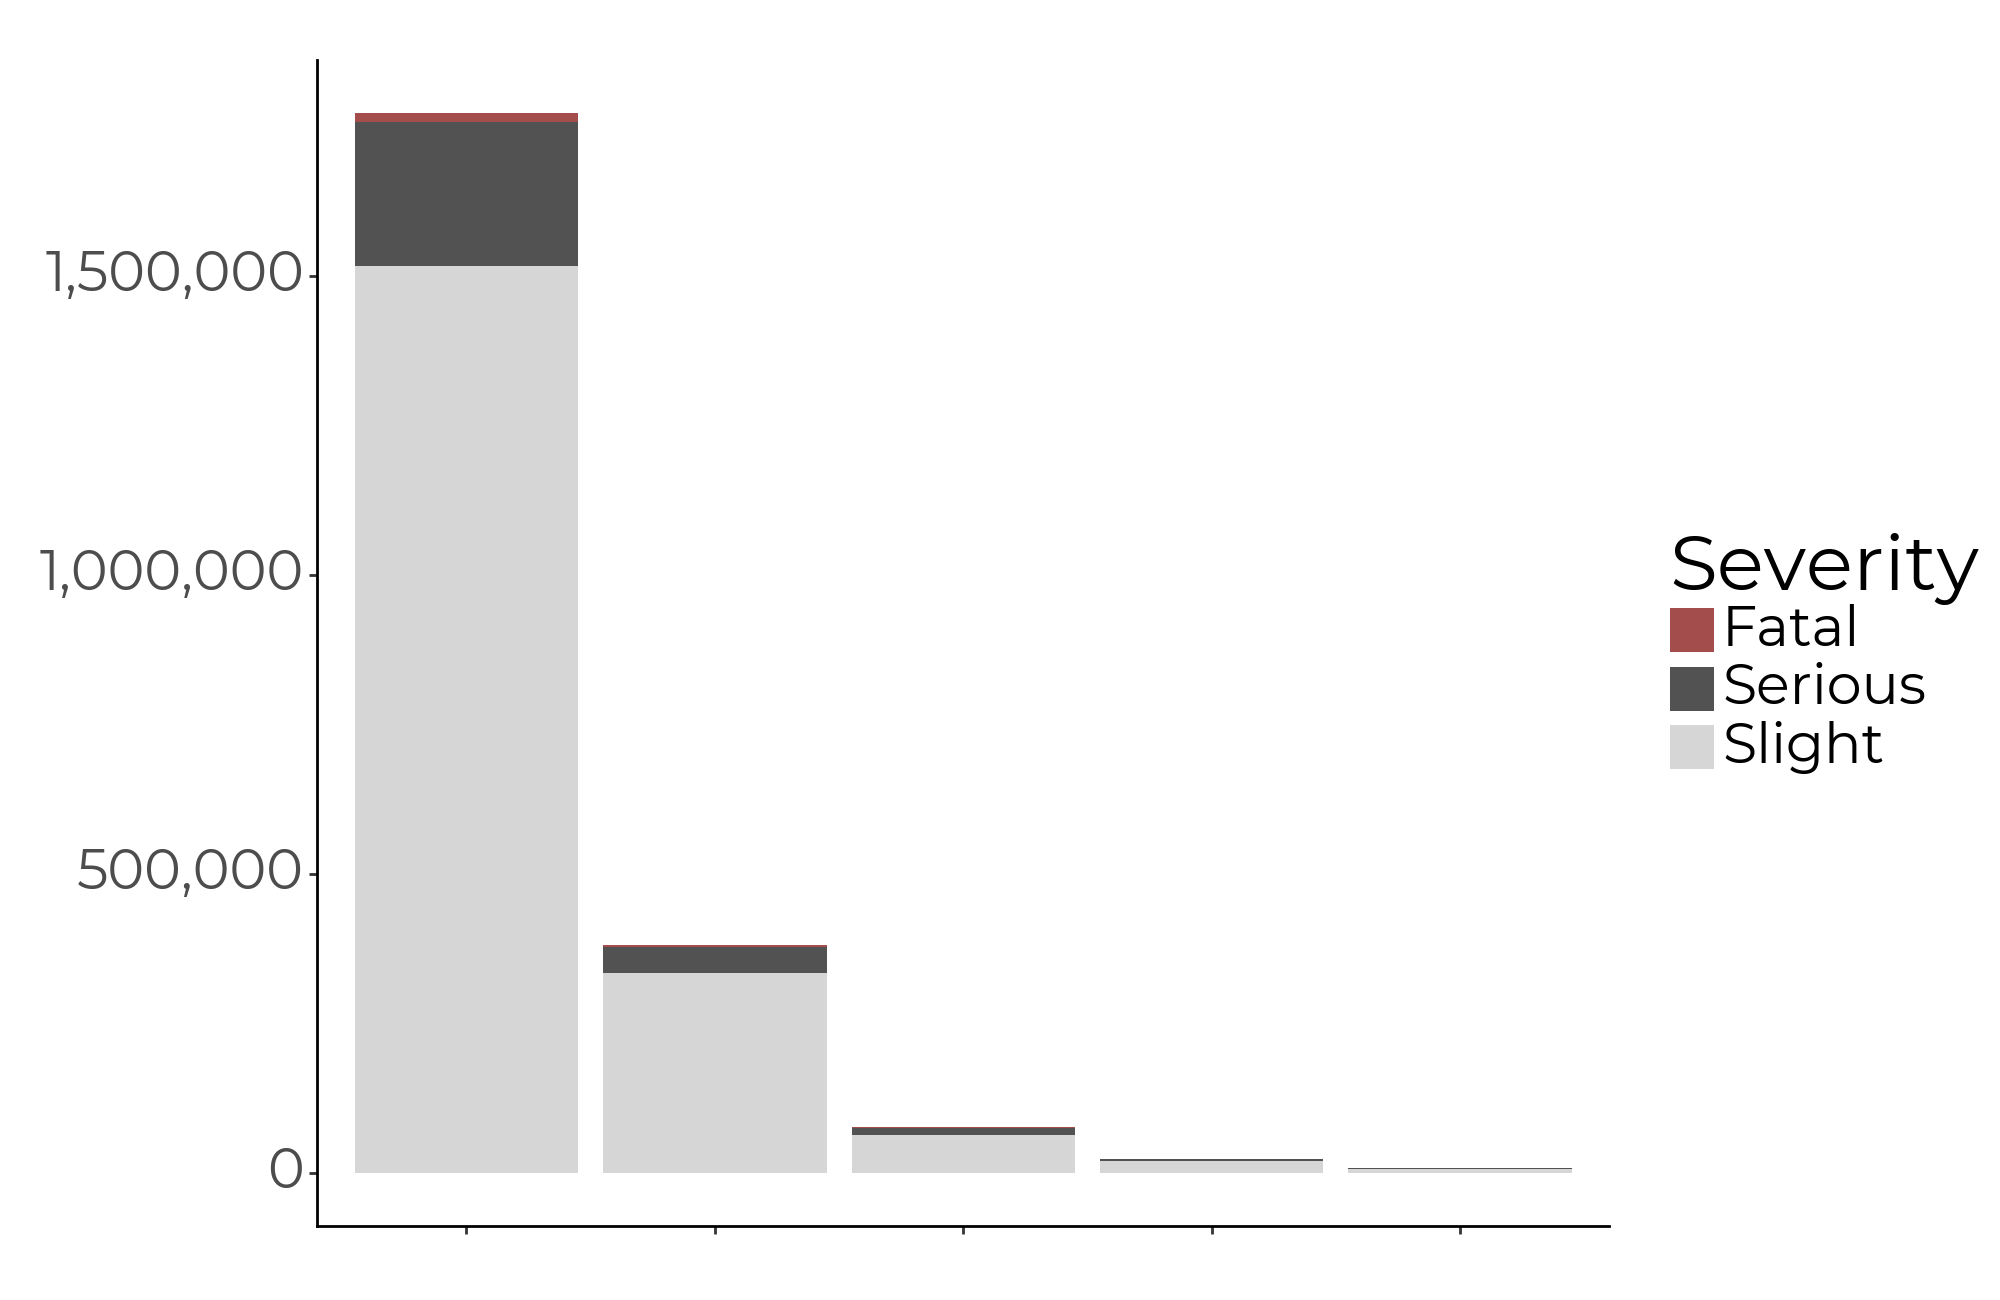

c:\Users\loma5202\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 10 x 6.5 in image.
c:\Users\loma5202\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: ../4_other/acc_jct_control.svg


In [84]:
# Count vs Junction Control

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_control_filtered.groupby(['junction_control', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
df_total_counts = df_grouped.groupby('junction_control')['count'].sum().reset_index(name='total_count')

# Merge the total counts back to the grouped dataframe
df_grouped = df_grouped.merge(df_total_counts, on='junction_control')

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_control, -total_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="", x="", title="", fill="Severity",) +
    scale_y_continuous(labels=lambda x: ["{:,}".format(int(label)) for label in x]) +
    theme_classic() +
    theme(
        #axis_text_x=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1, size=20, family="Montserrat"),
        axis_text_y=element_text(size=20, family="Montserrat"),
        legend_title=element_text(size=28, family="Montserrat"),
        legend_text=element_text(size=20, family="Montserrat"),
        figure_size=(10, 6.5)
    )
)

print(plot)

ggsave(plot, "../4_other/acc_jct_control.svg", format="svg")

In [90]:
# Calculate percentage

# Filter for only fatal accidents
df_fatal = df_junction_control_filtered[df_junction_control_filtered['accident_severity'] == 'Fatal']

# Group by junction_detail and count the number of fatal accidents
df_fatal_counts = df_fatal.groupby('junction_control').size().reset_index(name='fatal_count')

# Group the original filtered dataframe by junction_detail and count the total accidents
df_total_counts = df_junction_control_filtered.groupby('junction_control').size().reset_index(name='total_count')

# Merge the fatal counts with the total counts
df_percentage = pd.merge(df_fatal_counts, df_total_counts, on='junction_control')

# Calculate the percentage of fatal accidents
df_percentage['fatal_percentage'] = df_percentage['fatal_count'] / df_percentage['total_count'] * 100

df_percentage

,junction_control,fatal_count,total_count,fatal_percentage
0,Auth. Person,32,7291,0.438897
1,Give Way/Unctrl,15352,1771664,0.866530
2,Not Jct,1689,77308,2.184767
3,Stop Sign,182,23521,0.773777
4,Traffic Signal,2389,380122,0.628482


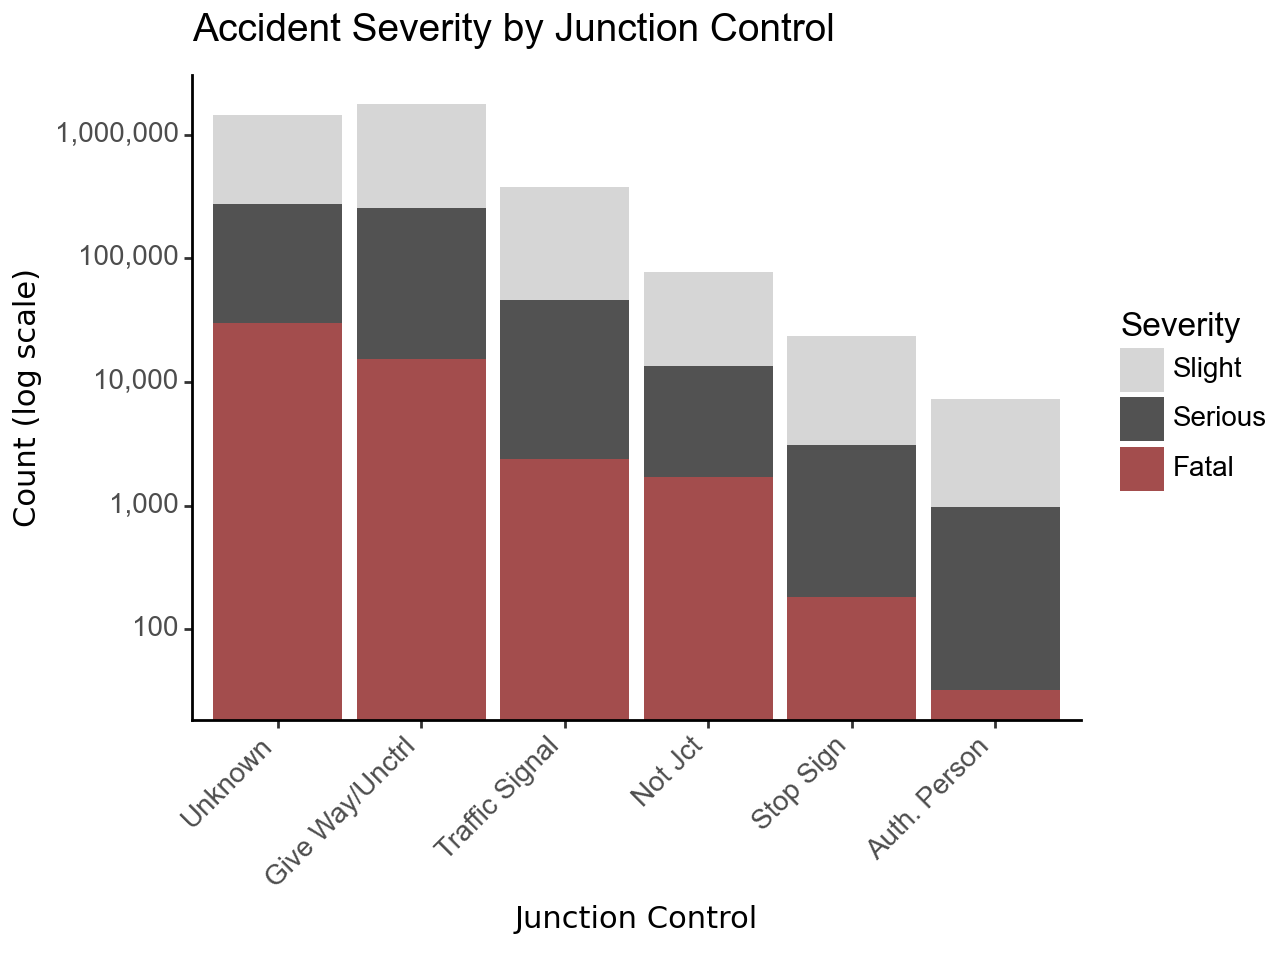

In [19]:
# Including Unknown values, sort by number of fatal accidents, absolute counts on logarithmic scale

# Filter for only fatal accidents within the junction control dataset
df_fatal = df_junction_control[df_junction_control['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_control').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_control.groupby(['junction_control', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='junction_control', how='left')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_control, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="Junction Control", fill="Severity", title="Accident Severity by Junction Control") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)

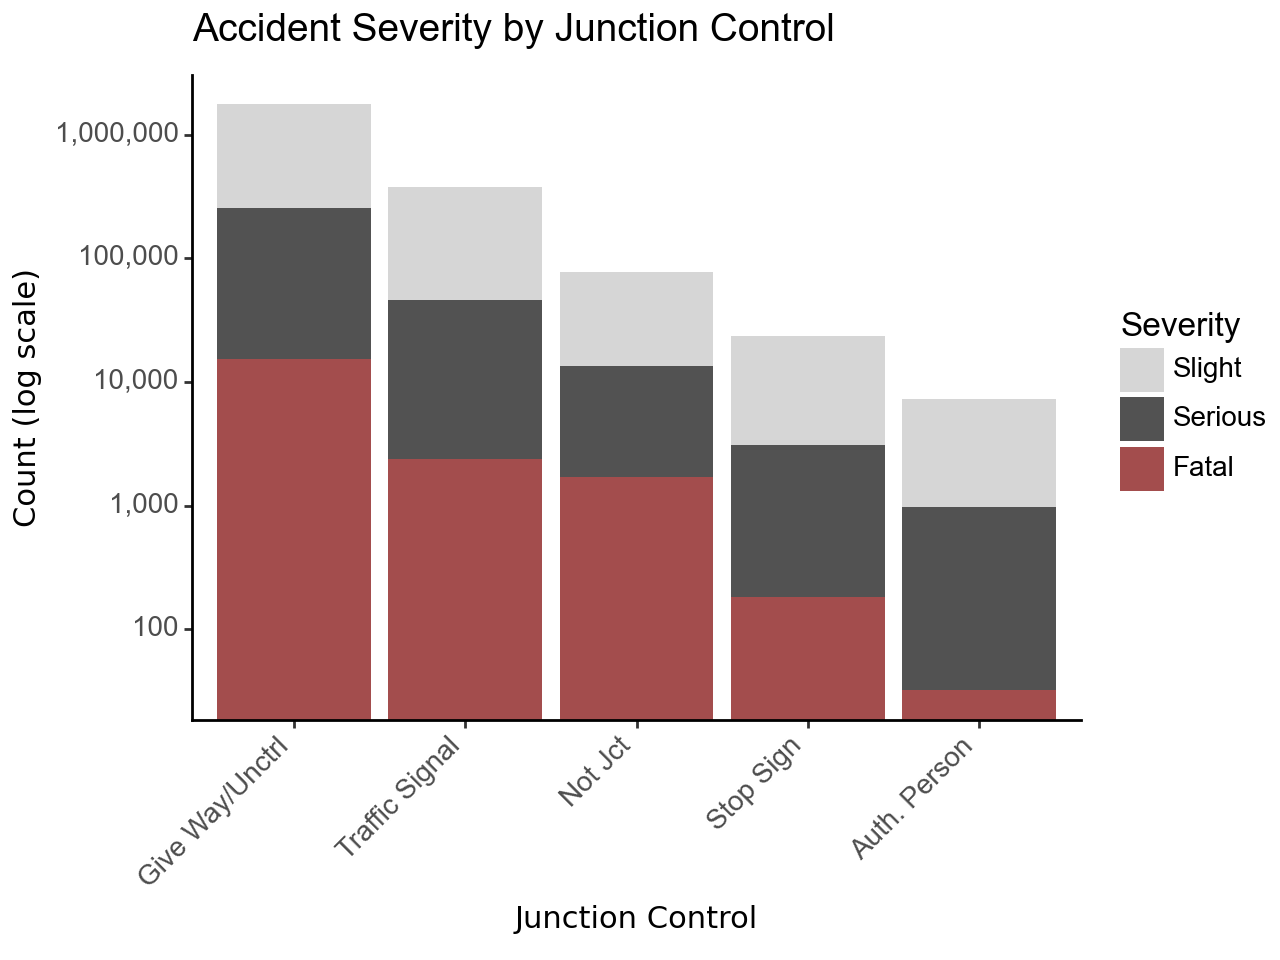

In [20]:
# Excluding Unknown values, sort by number of fatal accidents, absolute counts on logarithmic scale

# Filter for only fatal accidents within the junction control dataset
df_fatal = df_junction_control_filtered[df_junction_control_filtered['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_control').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_junction_control_filtered.groupby(['junction_control', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='junction_control', how='left')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(junction_control, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="Junction Control", fill="Severity", title="Accident Severity by Junction Control") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)

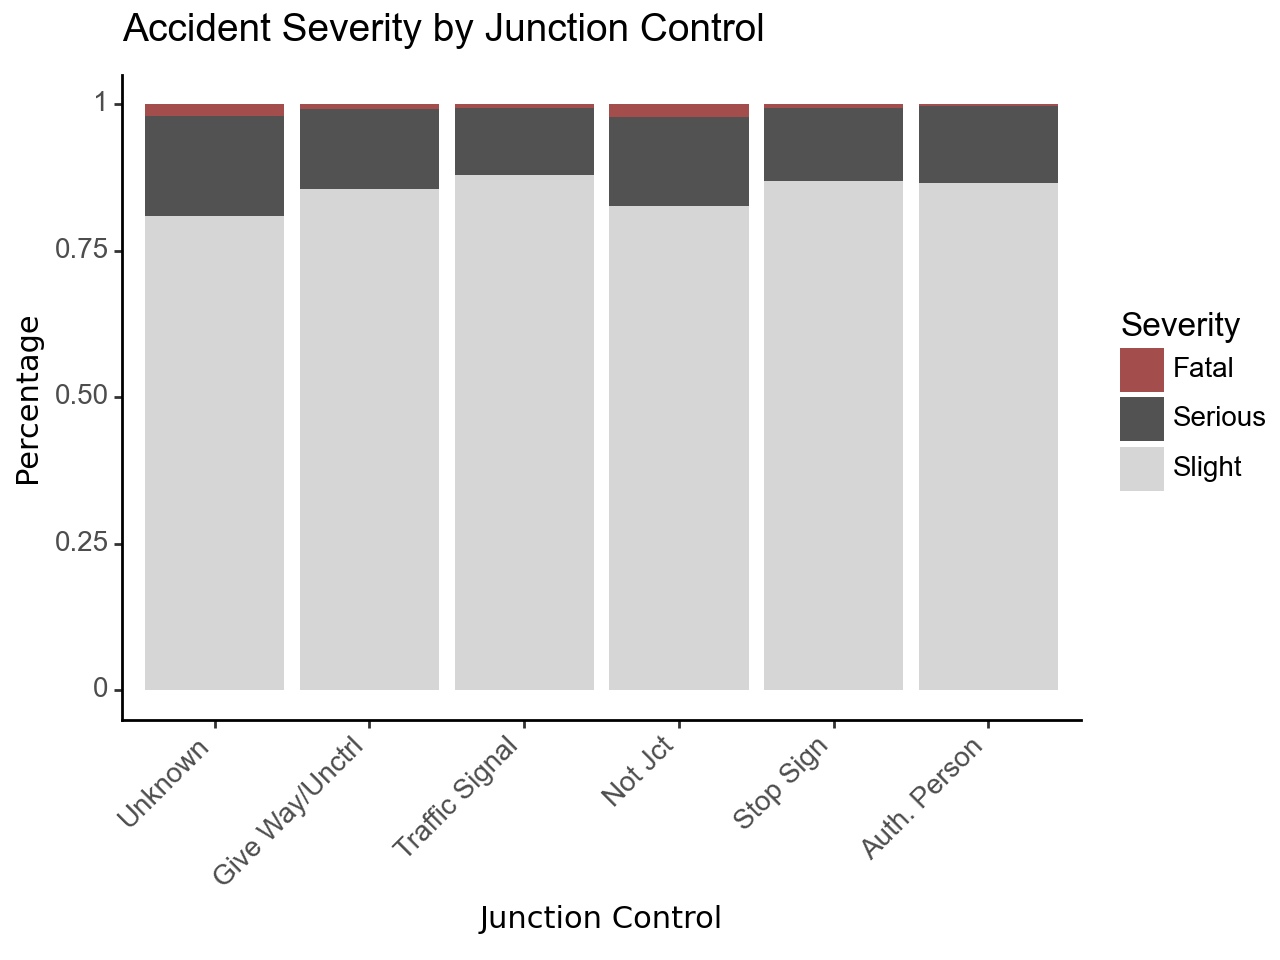

In [31]:
# Including Unknown values, sort by number of fatal accidents, relative counts on a percentage scale

# Filter for only fatal accidents within the junction control dataset
df_fatal = df_junction_control[df_junction_control['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_control').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped_control = df_junction_control.groupby(['junction_control', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts_control = df_grouped_control.groupby('junction_control')['count'].transform('sum')

# Calculate the percentage
df_grouped_control['percentage'] = df_grouped_control['count'] / total_counts_control * 100

# Merge with fatal counts for ordering
df_grouped_control = df_grouped_control.merge(df_fatal_counts, on='junction_control')

# Plot for junction detail vs. accident severity
plot_junction_control = (
    ggplot(df_grouped_control, aes(x='reorder(junction_control, -fatal_count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='fill') +  # Stacked bar plot with relative counts
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Percentage", x="Junction Control", fill="Severity", title="Accident Severity by Junction Control") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot_junction_control)

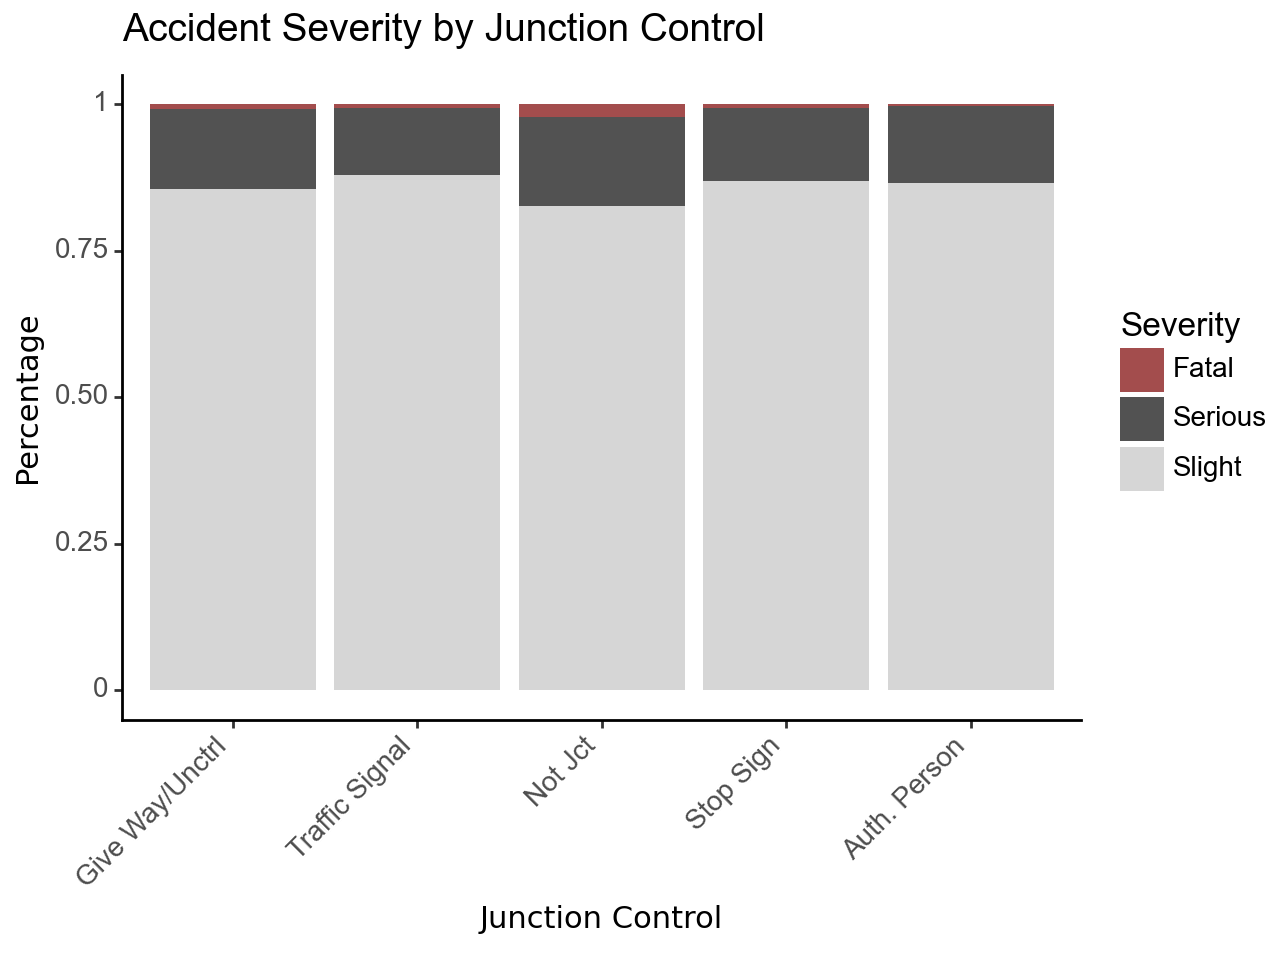

In [34]:
# Excluding Unknown values, sort by number of fatal accidents, relative counts on a percentage scale

# Filter for only fatal accidents within the junction control dataset
df_fatal = df_junction_control_filtered[df_junction_control_filtered['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('junction_control').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped_control = df_junction_control_filtered.groupby(['junction_control', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts_control = df_grouped_control.groupby('junction_control')['count'].transform('sum')

# Calculate the percentage
df_grouped_control['percentage'] = df_grouped_control['count'] / total_counts_control * 100

# Merge with fatal counts for ordering
df_grouped_control = df_grouped_control.merge(df_fatal_counts, on='junction_control')

# Plot for junction detail vs. accident severity
plot_junction_control = (
    ggplot(df_grouped_control, aes(x='reorder(junction_control, -fatal_count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='fill') +  # Stacked bar plot with relative counts
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Percentage", x="Junction Control", fill="Severity", title="Accident Severity by Junction Control") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot_junction_control)

## Speed limit

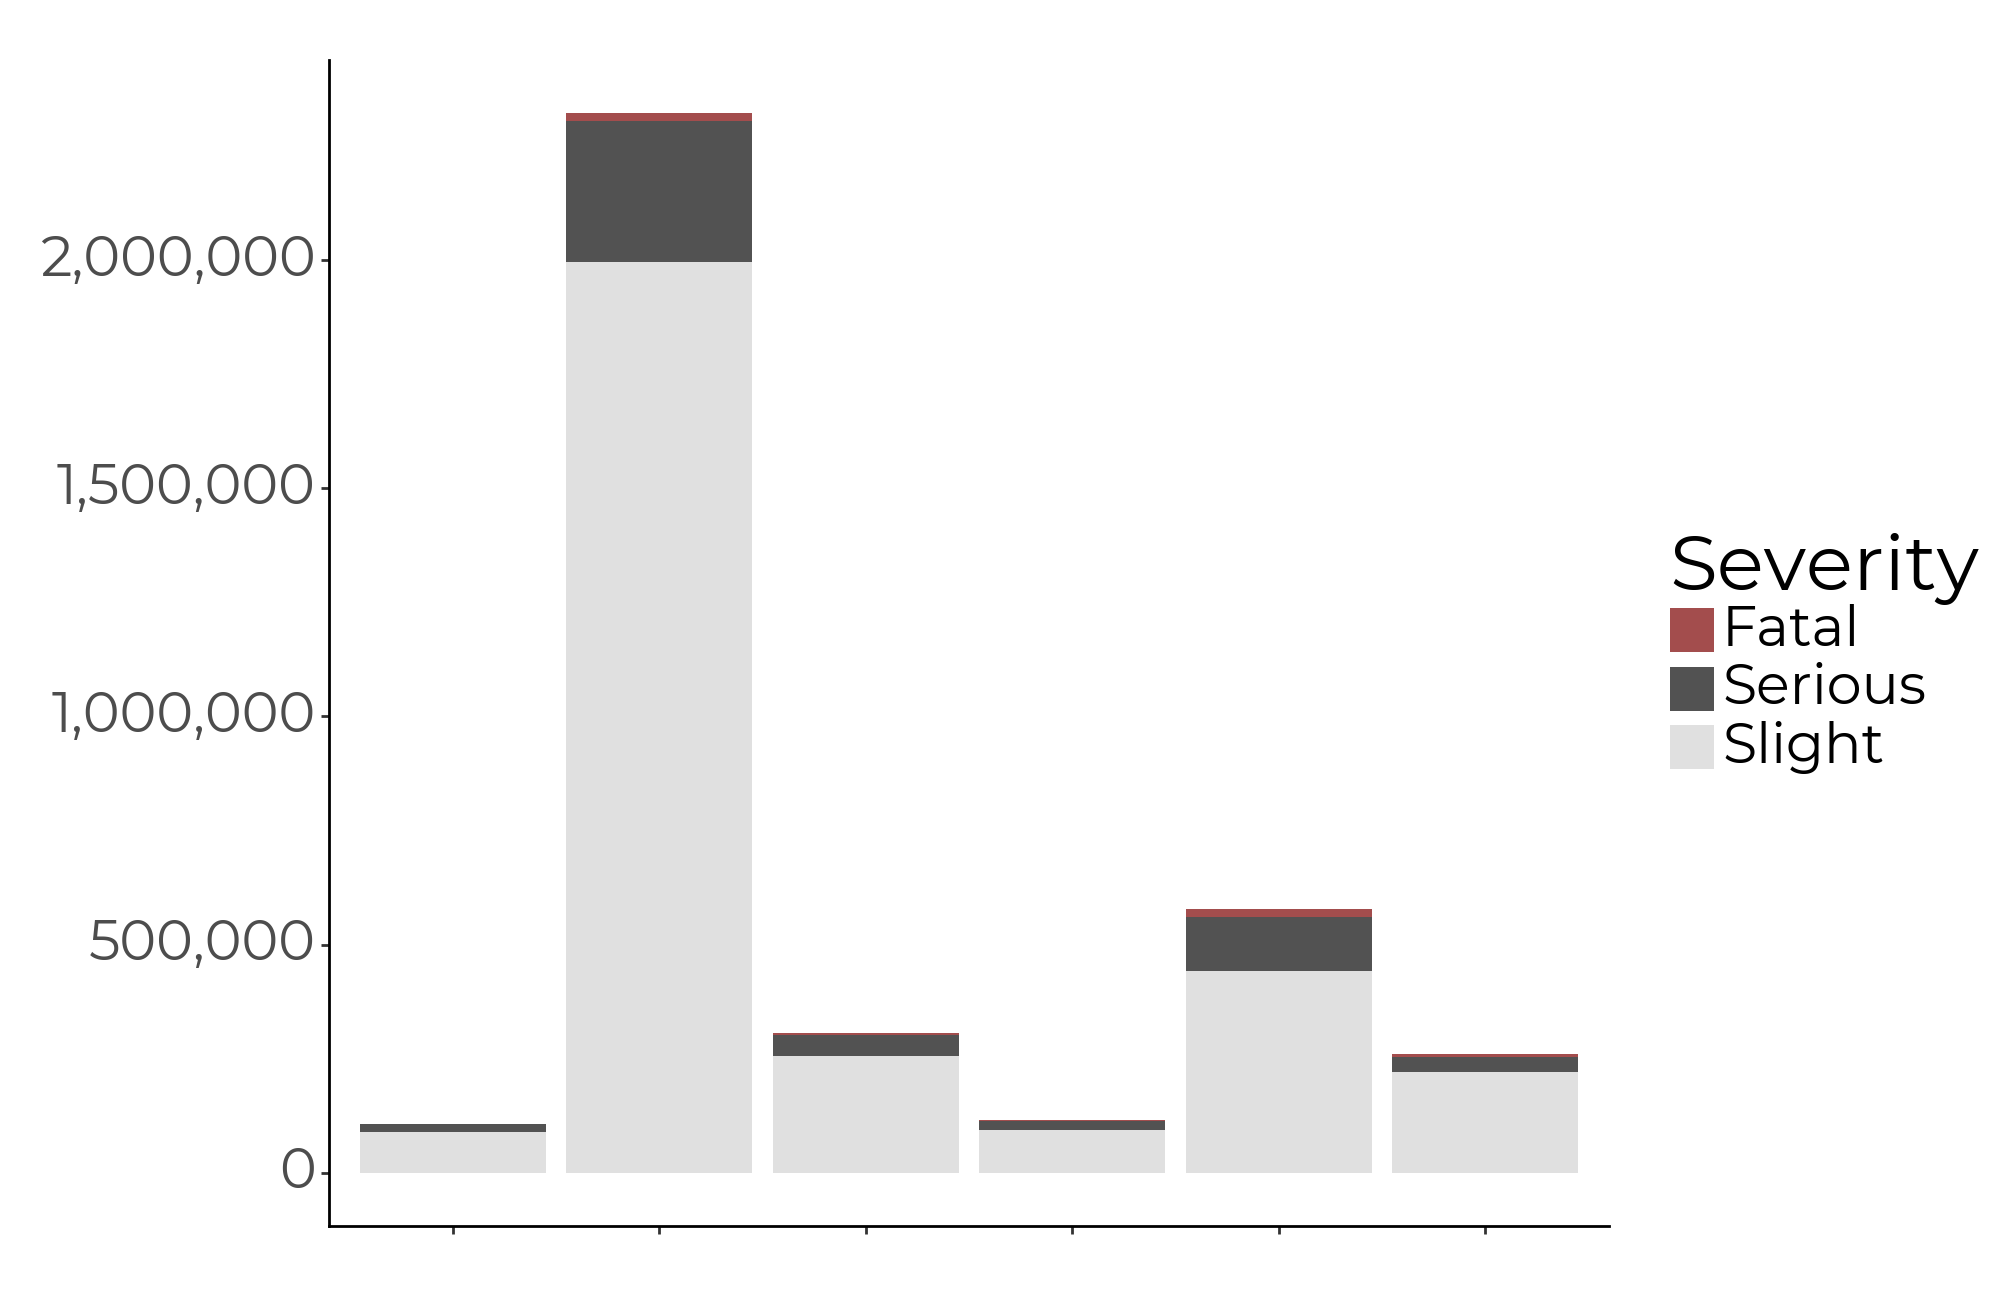

In [89]:
# Count vs Speed Limit

# Calculate the count of each accident severity within each junction detail
df_grouped = df_speed_limit_filtered.groupby(['binned_speed_limit', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
df_total_counts = df_grouped.groupby('binned_speed_limit')['count'].sum().reset_index(name='total_count')

# Merge the total counts back to the grouped dataframe
df_grouped = df_grouped.merge(df_total_counts, on='binned_speed_limit')

# Plot
plot = (
    ggplot(df_grouped, aes(x='binned_speed_limit', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_fill_manual(values=["#A34D4D", "#525252", "#E0E0E0"]) +  # Specify your colors here
    labs(y="", x="", title="", fill="Severity",) +
    scale_y_continuous(labels=lambda x: ["{:,}".format(int(label)) for label in x]) +
    theme_classic() +
    theme(
        axis_text_x=element_blank(),
        #axis_text_x=element_text(angle=45, hjust=1, size=20, family="Montserrat"),
        axis_text_y=element_text(size=20, family="Montserrat"),
        legend_title=element_text(size=28, family="Montserrat"),
        legend_text=element_text(size=20, family="Montserrat"),
        figure_size=(10, 6.5)
    )
)

print(plot)

#ggsave(plot, "../4_other/acc_speed_lim.svg", format="svg")

In [91]:
# Calculate percentage

# Filter for only fatal accidents
df_fatal = df_speed_limit_filtered[df_speed_limit_filtered['accident_severity'] == 'Fatal']

# Group by junction_detail and count the number of fatal accidents
df_fatal_counts = df_fatal.groupby('binned_speed_limit').size().reset_index(name='fatal_count')

# Group the original filtered dataframe by junction_detail and count the total accidents
df_total_counts = df_speed_limit_filtered.groupby('binned_speed_limit').size().reset_index(name='total_count')

# Merge the fatal counts with the total counts
df_percentage = pd.merge(df_fatal_counts, df_total_counts, on='binned_speed_limit')

# Calculate the percentage of fatal accidents
df_percentage['fatal_percentage'] = df_percentage['fatal_count'] / df_percentage['total_count'] * 100

df_percentage

,binned_speed_limit,fatal_count,total_count,fatal_percentage
0,Under 30,496,106486,0.465789
1,30,16475,2322502,0.709364
2,40,4647,306894,1.514204
3,50,2743,115665,2.371504
4,60,19056,578882,3.291863
5,70 Or Over,6381,261093,2.443957


c:\Users\loma5202\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


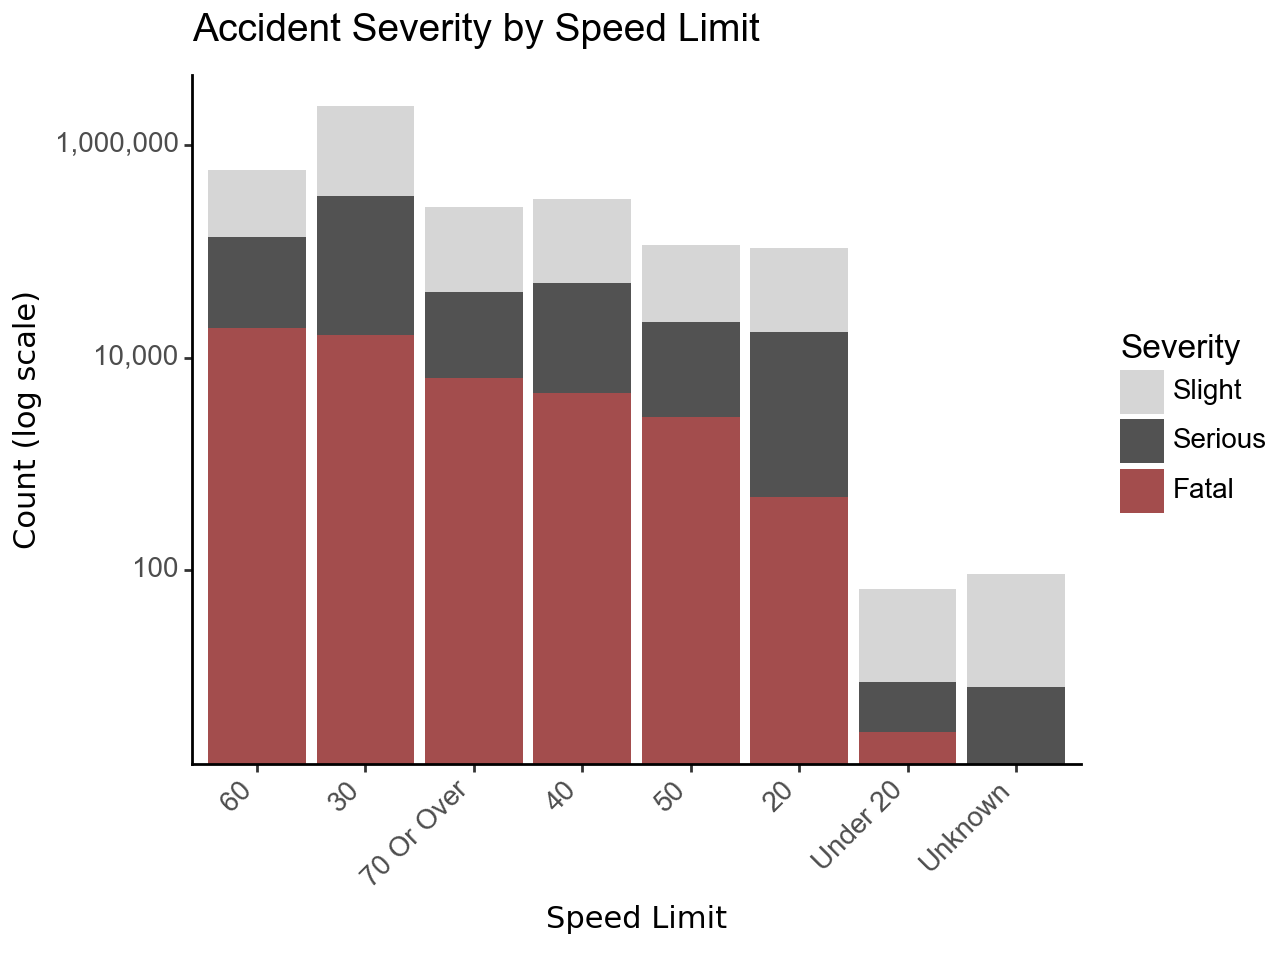

In [22]:
# Including Unknown values, sort by number of fatal accidents, absolute counts on logarithmic scale

# Filter for only fatal accidents within the speed limit dataset
df_fatal = df_speed_limit[df_speed_limit['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('binned_speed_limit').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_speed_limit.groupby(['binned_speed_limit', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='binned_speed_limit', how='left')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(binned_speed_limit, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="Speed Limit", fill="Severity", title="Accident Severity by Speed Limit") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)

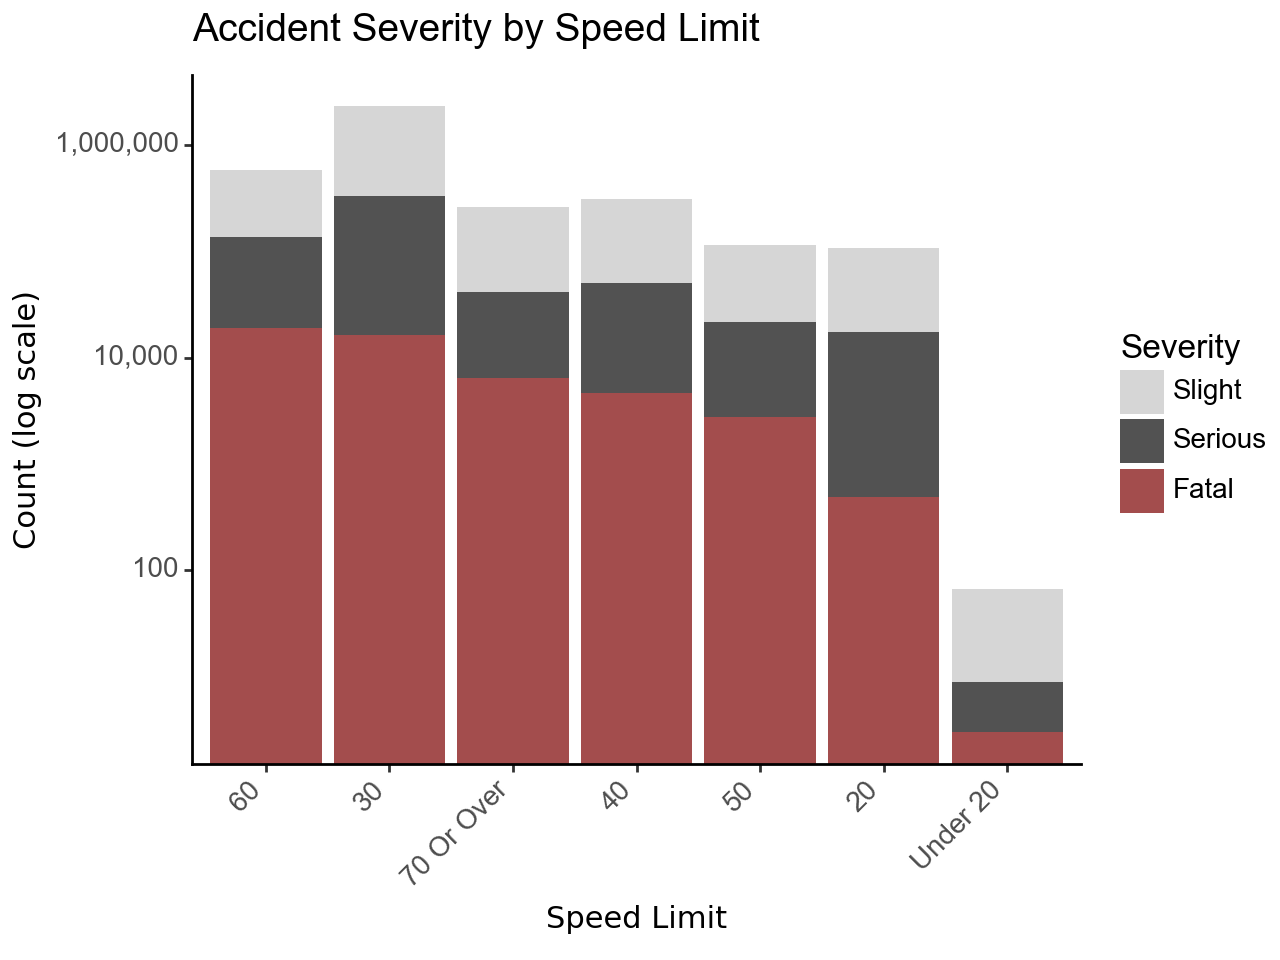

In [24]:
# Excluding Unknown values, sort by number of fatal accidents, absolute counts on logarithmic scale

# Filter for only fatal accidents within the speed limit dataset
df_fatal = df_speed_limit_filtered[df_speed_limit_filtered['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('binned_speed_limit').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped = df_speed_limit_filtered.groupby(['binned_speed_limit', 'accident_severity']).size().reset_index(name='count')

# Merge with fatal counts for ordering
df_grouped = df_grouped.merge(df_fatal_counts, on='binned_speed_limit', how='left')

# Reverse the Order of Stacking
df_grouped['accident_severity'] = pd.Categorical(df_grouped['accident_severity'], categories=reversed(df_grouped['accident_severity'].cat.categories))

# Plot
plot = (
    ggplot(df_grouped, aes(x='reorder(binned_speed_limit, -fatal_count)', y='count', fill='accident_severity')) +
    geom_bar(stat='identity', position='stack') +  # Stacked bar plot
    scale_y_continuous(labels=custom_format('{:,.0f}'), trans='log10') +  # Non-scientific format for y-axis
    scale_fill_manual(values=["#D6D6D6", "#525252", "#A34D4D"]) +  # Specify your colors here
    labs(y="Count (log scale)", x="Speed Limit", fill="Severity", title="Accident Severity by Speed Limit") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot)

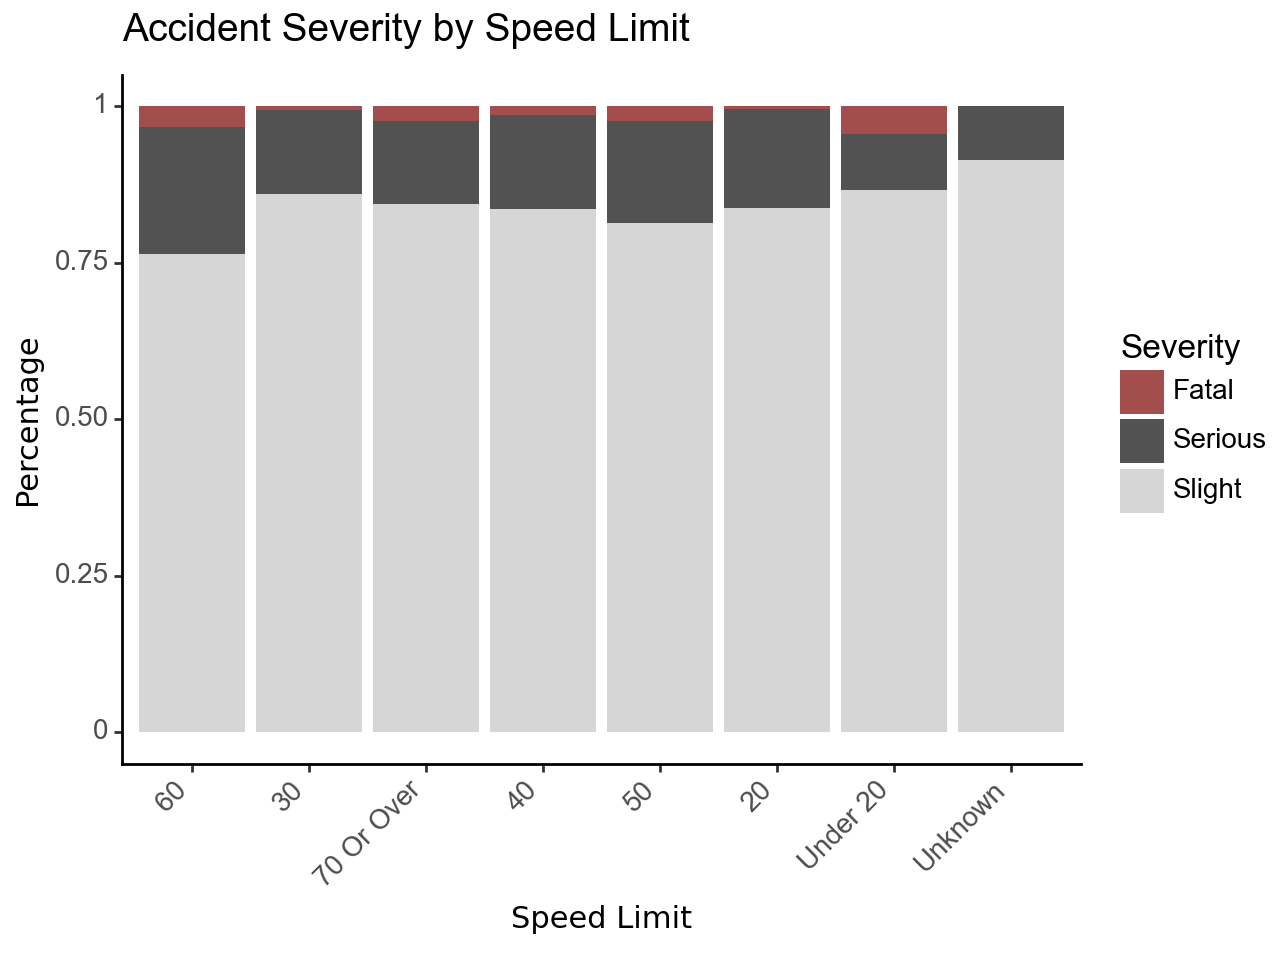

In [35]:
# Including Unknown values, sort by number of fatal accidents, relative counts on a percentage scale

# Filter for only fatal accidents within the speed limit dataset
df_fatal = df_speed_limit[df_speed_limit['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('binned_speed_limit').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped_speed = df_speed_limit.groupby(['binned_speed_limit', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts_speed = df_grouped_speed.groupby('binned_speed_limit')['count'].transform('sum')

# Calculate the percentage
df_grouped_speed['percentage'] = df_grouped_speed['count'] / total_counts_speed * 100

# Merge with fatal counts for ordering
df_grouped_speed = df_grouped_speed.merge(df_fatal_counts, on='binned_speed_limit')

# Plot for junction detail vs. accident severity
plot_speed_limit = (
    ggplot(df_grouped_speed, aes(x='reorder(binned_speed_limit, -fatal_count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='fill') +  # Stacked bar plot with relative counts
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Percentage", x="Speed Limit", fill="Severity", title="Accident Severity by Speed Limit") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot_speed_limit)

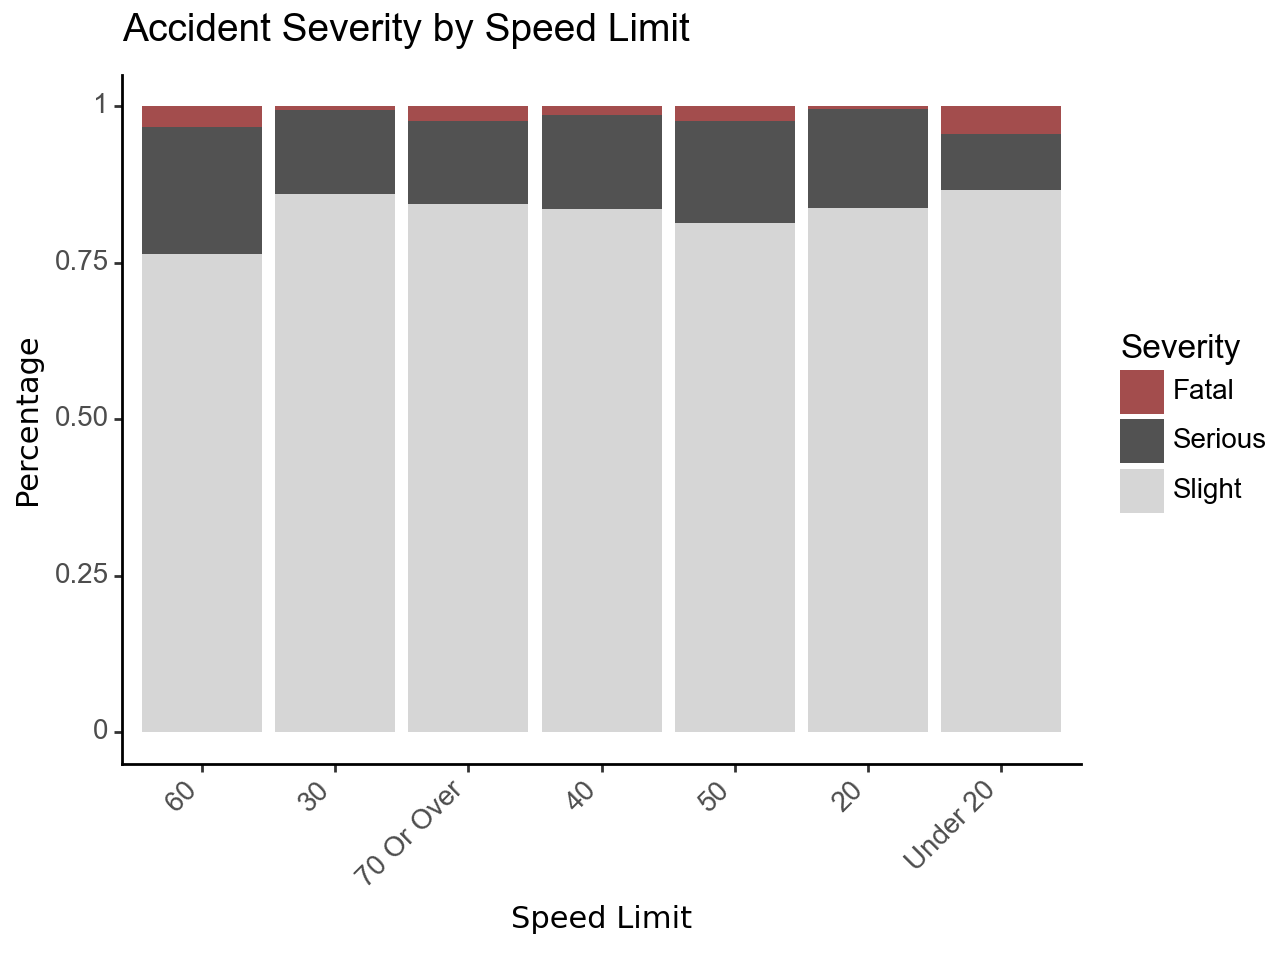

In [36]:
# Excluding Unknown values, sort by number of fatal accidents, relative counts on a percentage scale

# Filter for only fatal accidents within the speed limit dataset
df_fatal = df_speed_limit_filtered[df_speed_limit_filtered['accident_severity'] == 'Fatal']

# Calculate the count of fatal accidents for each junction detail
df_fatal_counts = df_fatal.groupby('binned_speed_limit').size().reset_index(name='fatal_count')

# Calculate the count of each accident severity within each junction detail
df_grouped_speed = df_speed_limit_filtered.groupby(['binned_speed_limit', 'accident_severity']).size().reset_index(name='count')

# Calculate the total count for each junction detail
total_counts_speed = df_grouped_speed.groupby('binned_speed_limit')['count'].transform('sum')

# Calculate the percentage
df_grouped_speed['percentage'] = df_grouped_speed['count'] / total_counts_speed * 100

# Merge with fatal counts for ordering
df_grouped_speed = df_grouped_speed.merge(df_fatal_counts, on='binned_speed_limit')

# Plot for junction detail vs. accident severity
plot_speed_limit = (
    ggplot(df_grouped_speed, aes(x='reorder(binned_speed_limit, -fatal_count)', y='percentage', fill='accident_severity')) +
    geom_bar(stat='identity', position='fill') +  # Stacked bar plot with relative counts
    scale_fill_manual(values=["#A34D4D", "#525252", "#D6D6D6"]) +  # Specify your colors here
    labs(y="Percentage", x="Speed Limit", fill="Severity", title="Accident Severity by Speed Limit") +
    theme_classic() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1, size=10, family="Arial"),
        axis_text_y=element_text(size=10, family="Arial"),
        plot_title=element_text(size=14, family="Arial"),
        legend_title=element_text(size=12, family="Arial"),
        legend_text=element_text(size=10, family="Arial"),
        legend_position='right'
    )
)

print(plot_speed_limit)